# AI BOOTCAMP - Exercises Week 1 - Statistical Learning & Linear Regression

### Question 1
#### Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide *n* and *p*. 

__We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.__

This is a regression problem where the response variable is the CEO salary and the  *p*=3  predictors are profit, number of employees, and industry. Since we are interested in understanding which factors affect CEO salary, instead of trying to predict a CEO's salary given the the predictors, we are most interested in inference, or understanding the relationship between the predictors and the response. The data is for the top 500 firms in the US, meaning  *n*=500 .

__We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.__

This is a classification problem because we are putting products into one of two categories: success or failure. Since we want to know whether or not the new product will be a success or a failure, we are most interested in prediction. In this situation,  *n*=20  for the 20 similar products that were previously launched. There are  *p*=13  predictors: price charged for the product, marketing budget, competition price, and the ten other variables collected.

__We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.__


This is a regression problem where the response variable is the % change in the USD/Euro exchange rate and the  *p*=3  predictors are the % change in the US market, the % change in the British market, and the % change in the German market. In this situation we are most interested in prediction. Lastly, since we collected weekly data for all of 2012,  *n*=52 .

***

### Question 2. 
#### What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

One main advantage to a very flexible statistical learning approach is the ability to generate a much wider range of possible shapes to estimate  $f$ . This is helpful if the relationship between the predictors and response is quite non-linear, as less-flexible methods have more restrictions to the shapes of  $f$  they can generate, and therefore could generate models which are inherently far from the actual shape of  $f$ . Up to a point, higher flexibility also allows the model to make more accurate predictions, which is desirable if we are mainly interested in prediction. However, as flexibility increases, the interpretability of the models generated decreases. This is undesirable if we are mainly interested in inference and understanding the underlying relationship between the predictors and response. In that case, when inference is the main goal, a less flexible approach may be preferrable.

***

### Question 3. 
#### Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a nonparametric approach)? What are its disadvantages?

A parametric approach to statistical learning involves first making an assumption about the functional form or shape of the relationship between the predictors and the response. For example, one common starting assumption for a parametric approach is assuming a linear relationship

$f(X)=\beta_0+\beta_1 X_1+\beta_2 X_2+⋯+\beta_p X_p.$
 
The advantage of making this assumption in the parametric approach is that it reduces the problem of estimating  $f$  to the problem of estimating parameters. This is usually much easier than trying to fit an entirely arbitrary function. However, the downside to this approach lies in choice made when choosing the initial model. The choice involves making simplifying assumptions which then results in a model which usually means the model will not match the true form of  $f$ . Moreover, if we choose a model that is too far from the true  $f$ , we'll have intrinsically bad estimates.

A non-parametric approach, on the other hand, doesn't involve making any initial assumptions about the shape of the relationship between the predictors and the response. Instead, the approach involves estimating  $f$  in a way that gets as close to the data points as possible while maintaiing some minimum notion of smoothness. The main advantage to avoiding the initial assumption about the form of  $f$ is that non-parametric methods can potentially more accurately fit a wider range of possible shapes of  $f$ . However, since no assumptions are made about the form of  $f$ , a very large number of observations is required to obtain an accurate estimate for  $f$ .

***

### Question 4. 
#### This exercise relates to the [College](https://www.statlearning.com/s/College.csv) data set, which contains a number of variables for 777 different universities and colleges in the US. The variables are:

 - `Private` : Public/private indicator
 - `Apps` : Number of applications received
 - `Accept` : Number of applicants accepted
 - `Enroll` : Number of new students enrolled
 - `Top10perc` : New students from top 10 % of high school class
 - `Top25perc` : New students from top 25 % of high school class
 - `F.Undergrad` : Number of full-time undergraduates
 - `P.Undergrad` : Number of part-time undergraduates
 - `Outstate` : Out-of-state tuition
 - `Room.Board` : Room and board costs
 - `Books` : Estimated book costs
 - `Personal` : Estimated personal spending
 - `PhD` : Percent of faculty with Ph.D.’s
 - `Terminal` : Percent of faculty with terminal degree
 - `S.F.Ratio` : Student/faculty ratio
 - `perc.alumni` : Percent of alumni who donate
 - `Expend` : Instructional expenditure per student
 - `Grad.Rate` : Graduation rate

Before reading the data into `Python`, it can be viewed in Excel or a text editor.

In [3]:
#Load the standard Python data science packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### (a) Use the `pd.read_csv()` function to read the data into R. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.


In [2]:
college = pd.read_csv("https://www.statlearning.com/s/College.csv")

#### (b) Look at the data using the `head()` function. You should notice that the first column is just the name of each university. We don’t really want `Python` to treat this as data. However, it may be handy to have these names for later. Try the following commands:

```
college.set_index("Unnamed: 0", inplace=True)
college.head()
```

#### You should see that the row index is now a names column with the name of each university recorded and the first data column is `Private`. Note that another column labeled `Unnamed: 0` now appears before the `Private` column. However, this is not a data column but rather the name that `Python` is giving to each row. You can use the `.rename_axis` function to make it more descriptive if you'd like



In [3]:
college.set_index("Unnamed: 0", inplace = True)
college.head()

Private  Apps  Accept  Enroll  Top10perc  \
Unnamed: 0                                                              
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Unnamed: 0                                                                    
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Unnamed: 0                                                                 
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Unnamed: 0                                                               
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [4]:
#Rename the index to be more descriptive
college.rename_axis(index = "College", inplace = True)
college.head()

Private  Apps  Accept  Enroll  Top10perc  \
College                                                                 
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                       
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
College                                                                    
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
College                                                                  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

Now you should see that the first data column is `Private`. Note that we could have also taken care of this pre-processing when reading the original CSV file using the `index_col` argument in the `read_csv()` function.

In [5]:
# Have Pandas treat the zeroth column in the CSV file as the index
# Then give the index a more descriptive name.
pd.read_csv("https://www.statlearning.com/s/College.csv", index_col = 0).rename_axis(index = "College").head()

Private  Apps  Accept  Enroll  Top10perc  \
College                                                                 
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                       
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
College                                                                    
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
College                                                                  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

Before moving on, do the good practice of checking the data for any null values.

In [6]:
college.isnull().any()

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

#### (c)  Use the `describe()` function to produce a numerical summary of the variables in the data set.

In [7]:
# Generate numerical summary of all of the numerical variables in the college data set
college.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [8]:
# Since the private column is a categorical variable, it's more readable to describe it separately using groupby and count
college["Private"].groupby(by = college["Private"]).count()

Private
No     212
Yes    565
Name: Private, dtype: int64

#### (d) Use the `pairplot()` function to produce a scatterplot matrix of the first ten columns or variables of the data (`Apps` through `books`). Recall that you can reference the first ten columns of a dataframe `A` using `A.loc[:, "Col_1":"Col_10"]` where `Col_i` is the name of the _i_ th column. If we want to use purely integer-based indexing, then we would use `A.iloc[:, 1:11]`. Don't forget that label-based indexing includes the stop column, while integer-based indexing does not.


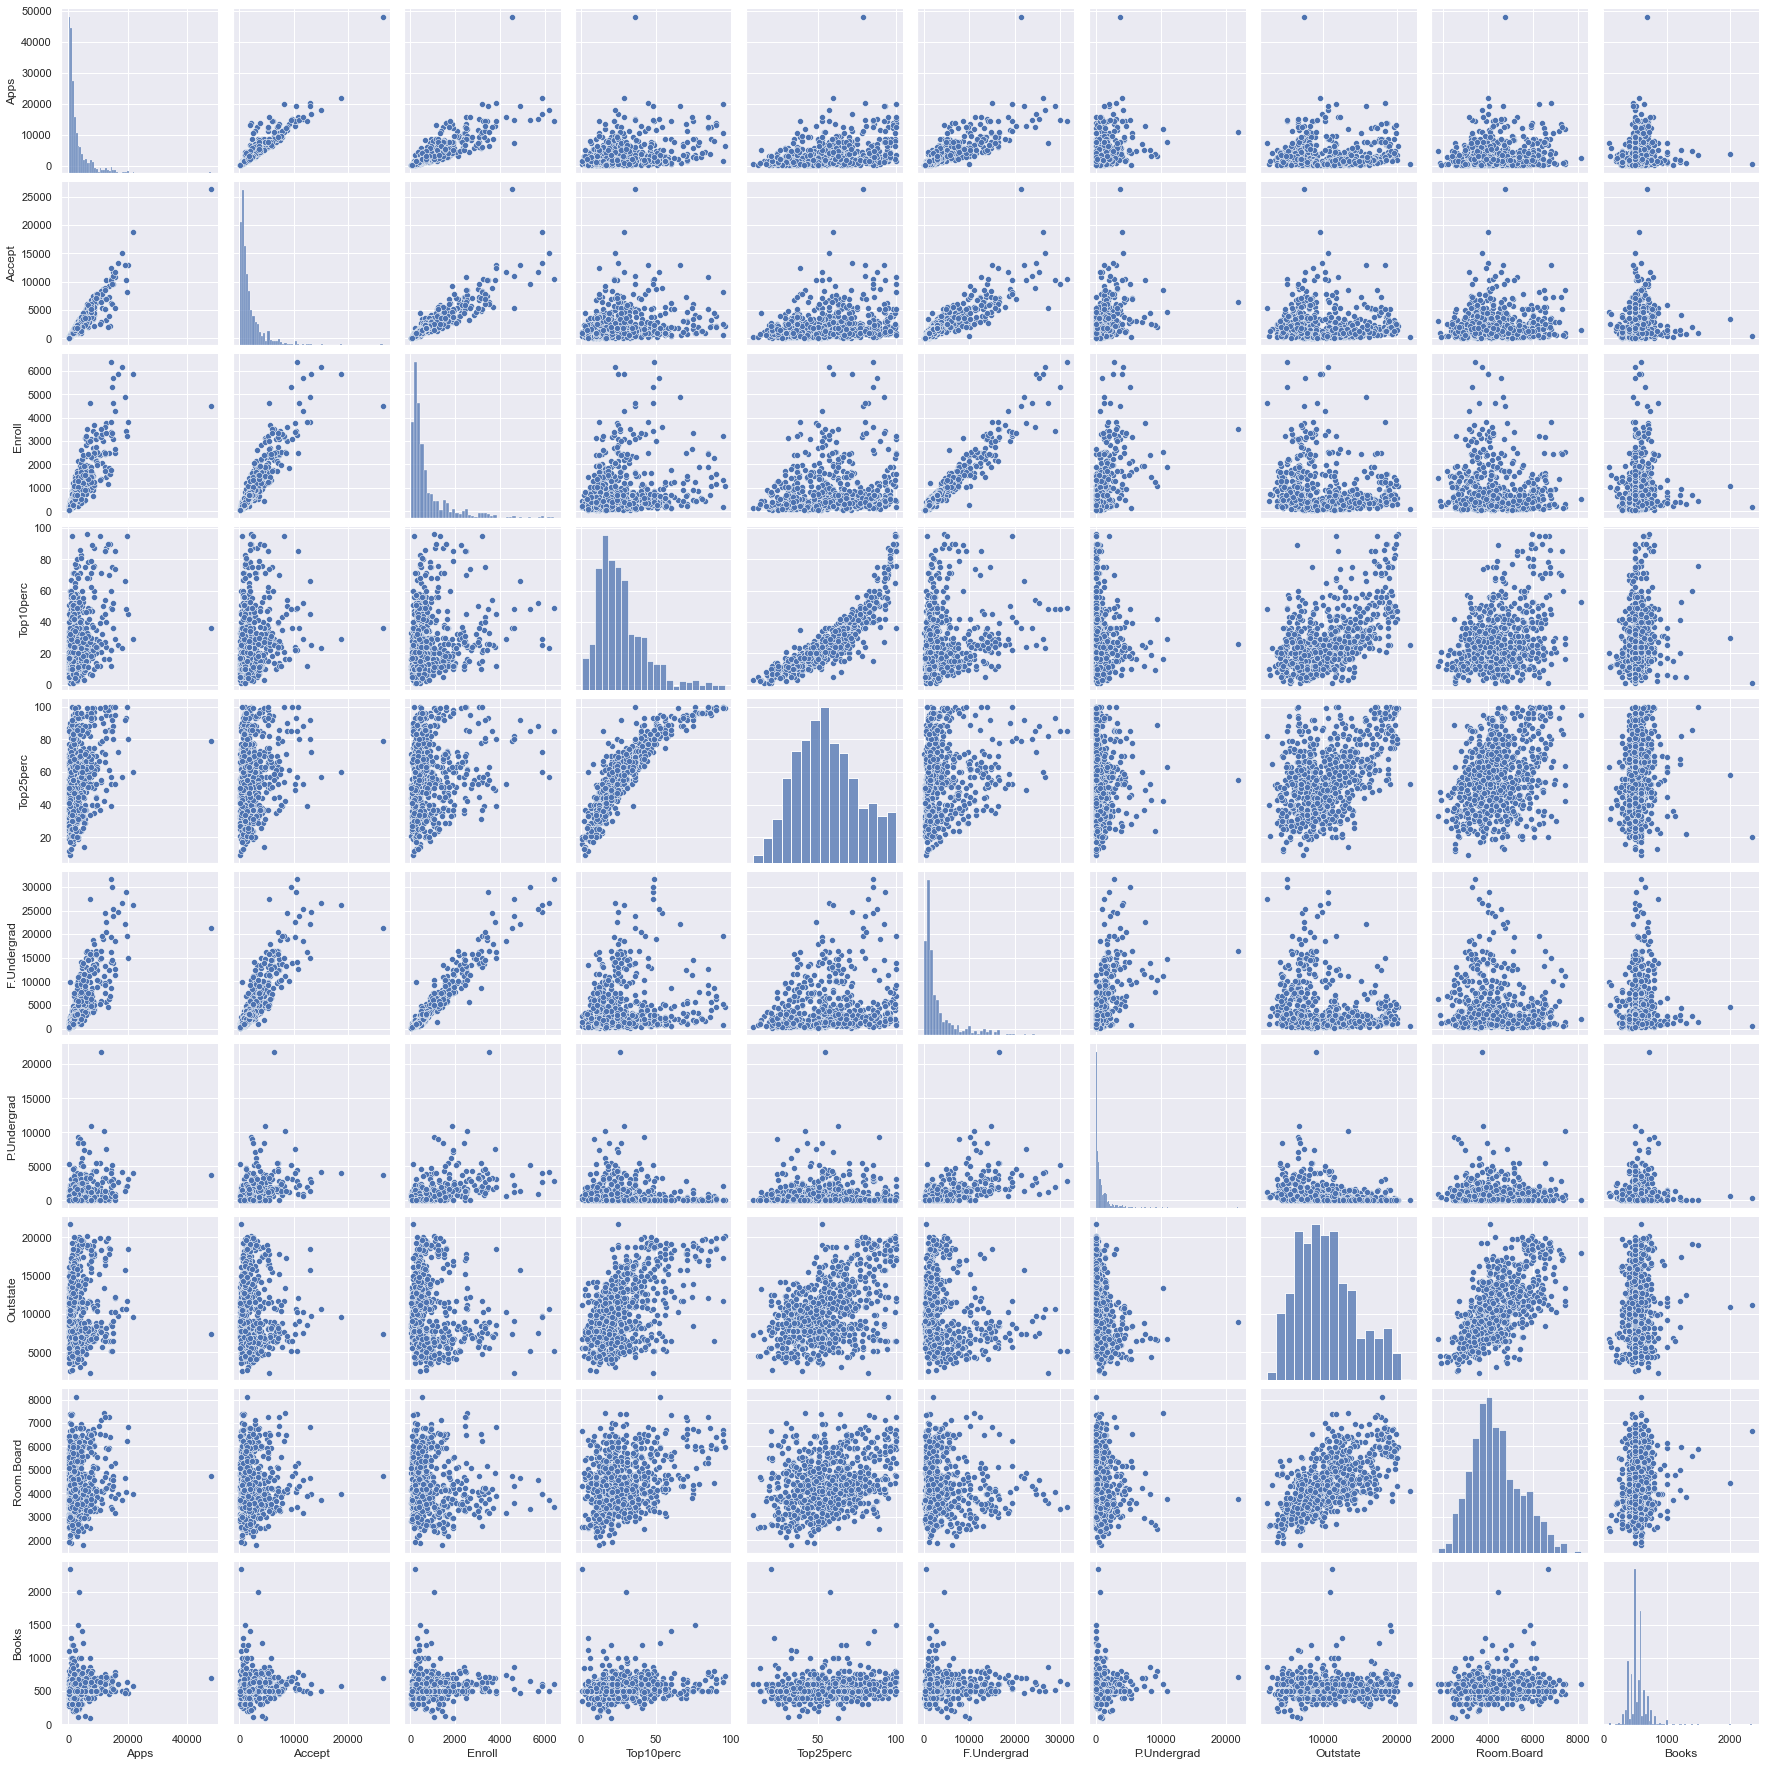

In [9]:
sns.pairplot(college.iloc[:,1:11])

#### (e) Use the `catplot()` function to produce side-by-side boxplots of `Outstate` versus `Private`.
 

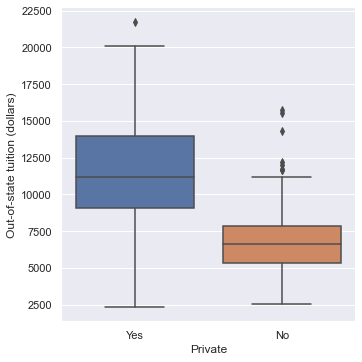

In [10]:
ax = sns.catplot(x = "Private", y = "Outstate", kind = "box", order = ["Yes", "No"], data = college)
# Seaborn returns an axis object, so we can set the label for the y-axis to be more descriptive
ax.set(ylabel = "Out-of-state tuition (dollars)")
plt.show()

#### (f) Create a new qualitative variable, called `Elite`, by _binning_ the `Top10perc` variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10 % of their high school classes exceeds 50 %.

```
# Create a new column called Elite and set the default value as "No"
college["Elite"] = "No"
# Select all rows (i.e. schools) with over 50% of their students coming from the top 10% of their high school class
# Set the value of the Elite column for those schools to "Yes"
college.loc[college["Top10perc"] > 50, "Elite"] = "Yes"
```
#### Use the `groupby()` and `count()` functions to see how many elite universities there are. Now use the `catplot()` function to produce side-by-side boxplots of `Outstate` versus `Elite`.


In [11]:
# Create a new column called Elite and set the default value as "No"
college["Elite"] = "No"

# Select all rows (i.e. schools) with over 50% of their students coming from the top 10% of their high school class
# Set the value of the Elite column for those schools to "Yes"
college.loc[college["Top10perc"] > 50, "Elite"] = "Yes"

# Take the Elite column of the college data set, group by its values, and count the occurrences of each value
college["Elite"].groupby(by = college["Elite"]).count()

Elite
No     699
Yes     78
Name: Elite, dtype: int64

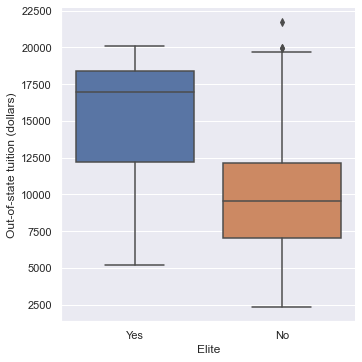

In [12]:
ax = sns.catplot(x = "Elite", y = "Outstate", kind = "box", order = ["Yes", "No"], data = college)
ax.set(ylabel = "Out-of-state tuition (dollars)")
plt.show()

#### (g) Use the `distplot()` function to produce some histograms with differing numbers of bins for a few of the quantitative variables. You may find the command `plt.subplots(2, 2)` useful: it will divide the print window into four regions so that four plots can be made simultaneously. Modifying the arguments to this function will divide the figure in other ways.

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Histograms of number of applicants by school type')

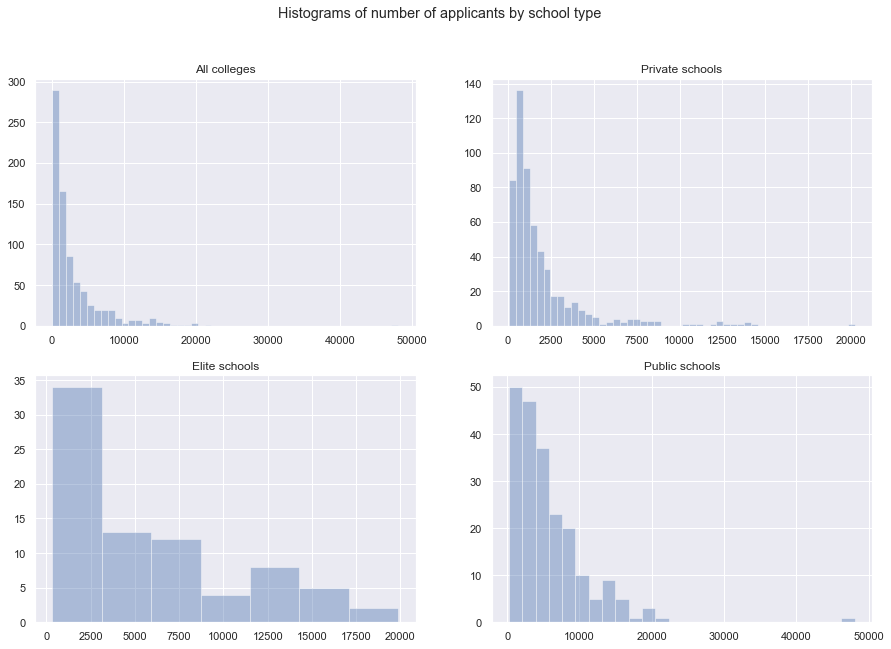

In [13]:
# Create grid of plots (fig)
# ax will be an array of four Axes objects
# Set the figure size so the plots aren't all squished together
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

# Create histogram for number of applicants across all colleges
sns.distplot(college["Apps"], kde = False, ax = axes[0, 0])
axes[0, 0].set(xlabel = "", title = "All colleges")

# Create histogram for number of applicants at private colleges
sns.distplot(college.loc[college["Private"] == "Yes", "Apps"], kde = False, ax = axes[0, 1])
axes[0, 1].set(xlabel = "", title = "Private schools")

# Create histogram for number of applicants at elite colleges
sns.distplot(college.loc[college["Elite"] == "Yes", "Apps"], kde = False, ax = axes[1, 0])
axes[1, 0].set(xlabel = "", title = "Elite schools")

# Create histogram for number of applicants at public colleges
sns.distplot(college.loc[college["Private"] == "No", "Apps"], kde = False, ax = axes[1, 1])
axes[1, 1].set(xlabel = "", title = "Public schools")

fig.suptitle("Histograms of number of applicants by school type")

In [14]:
# Generate numerical summary of applicants by public vs private school
college["Apps"].groupby(by = college["Private"]).describe()

count         mean          std    min      25%     50%     75%  \
Private                                                                    
No       212.0  5729.919811  5370.675335  233.0  2190.75  4307.0  7722.5   
Yes      565.0  1977.929204  2443.341319   81.0   619.00  1133.0  2186.0   

             max  
Private           
No       48094.0  
Yes      20192.0

In [15]:
# Generate numerical summary of applicants by elite vs non-elite school
college["Apps"].groupby(by = college["Elite"]).describe()

count         mean          std    min      25%     50%      75%  \
Elite                                                                     
No     699.0  2669.226037  3572.632737   81.0   695.50  1420.0  3187.50   
Yes     78.0  5980.564103  5025.659837  346.0  2175.75  3849.0  8595.25   

           max  
Elite           
No     48094.0  
Yes    19873.0

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Histograms of instructional expenditure (USD) per student by school type')

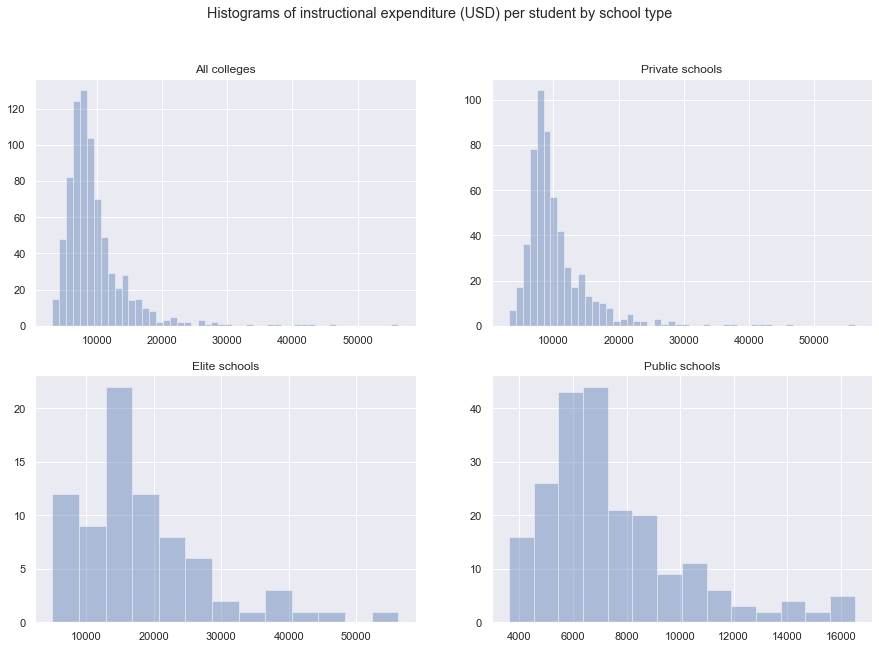

In [16]:
# Create grid of plots (fig)
# ax will be an array of four Axes objects
# Set the figure size so the plots aren't all squished together
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

# Create histogram for instructional expenditure per student across all colleges
sns.distplot(college["Expend"], kde = False, ax = axes[0, 0])
axes[0, 0].set(xlabel = "", title = "All colleges")

# Create histogram for instructional expenditure per student at private colleges
sns.distplot(college.loc[college["Private"] == "Yes", "Expend"], kde = False, ax = axes[0, 1])
axes[0, 1].set(xlabel = "", title = "Private schools")

# Create histogram for instructional expenditure per student at elite colleges
sns.distplot(college.loc[college["Elite"] == "Yes", "Expend"], kde = False, ax = axes[1, 0])
axes[1, 0].set(xlabel = "", title = "Elite schools")

# Create histogram for instructional expenditure per student at public colleges
sns.distplot(college.loc[college["Private"] == "No", "Expend"], kde = False, ax = axes[1, 1])
axes[1, 1].set(xlabel = "", title = "Public schools")

fig.suptitle("Histograms of instructional expenditure (USD) per student by school type")

In [17]:
# Generate numerical summary of instructional expenditure per student by public vs private schools
college["Expend"].groupby(by = college["Private"]).describe()

count          mean          std     min     25%     50%       75%  \
Private                                                                       
No       212.0   7458.316038  2695.541611  3605.0  5715.0  6716.5   8570.25   
Yes      565.0  10486.353982  5682.576587  3186.0  7477.0  8954.0  11625.00   

             max  
Private           
No       16527.0  
Yes      56233.0

In [18]:
# Generate numerical summary of instructional expenditure per student by elite vs non-elite schools
college["Expend"].groupby(by = college["Elite"]).describe()

count          mean          std     min       25%      50%       75%  \
Elite                                                                          
No     699.0   8684.367668  3246.275298  3186.0   6620.00   8086.0  10060.50   
Yes     78.0  18404.871795  9651.812255  4957.0  12644.25  15944.0  21420.25   

           max  
Elite           
No     42926.0  
Yes    56233.0

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Histograms of student-faculty ratio by school type')

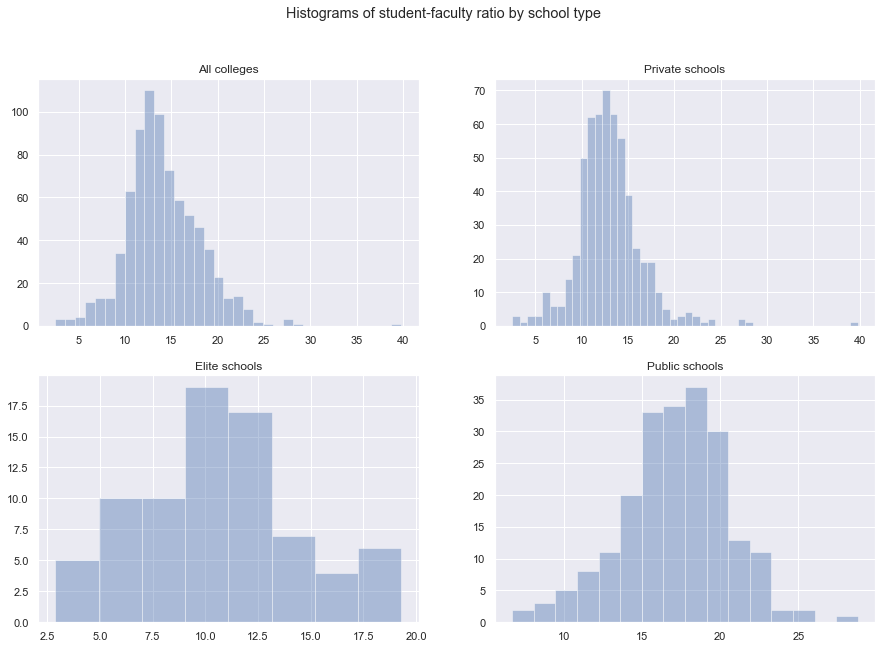

In [19]:
# Create grid of plots (fig)
# ax will be an array of four Axes objects
# Set the figure size so the plots aren't all squished together
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

# Create histogram for student-faculty ratio across all colleges
sns.distplot(college["S.F.Ratio"], kde = False, ax = axes[0, 0])
axes[0, 0].set(xlabel = "", title = "All colleges")

# Create histogram for student-faculty ratio at private colleges
sns.distplot(college.loc[college["Private"] == "Yes", "S.F.Ratio"], kde = False, ax = axes[0, 1])
axes[0, 1].set(xlabel = "", title = "Private schools")

# Create histogram for student-faculty ratio at elite colleges
sns.distplot(college.loc[college["Elite"] == "Yes", "S.F.Ratio"], kde = False, ax = axes[1, 0])
axes[1, 0].set(xlabel = "", title = "Elite schools")

# Create histogram for student-faculty ratio at public colleges
sns.distplot(college.loc[college["Private"] == "No", "S.F.Ratio"], kde = False, ax = axes[1, 1])
axes[1, 1].set(xlabel = "", title = "Public schools")

fig.suptitle("Histograms of student-faculty ratio by school type")

In [20]:
# Generate numerical summary of student-faculty ratio by public vs private schools
college["S.F.Ratio"].groupby(by = college["Private"]).describe()

count       mean       std  min   25%    50%     75%   max
Private                                                            
No       212.0  17.139151  3.418049  6.7  15.1  17.25  19.325  28.8
Yes      565.0  12.945487  3.518573  2.5  11.1  12.70  14.500  39.8

In [21]:
# Generate numerical summary of student-faculty ratio by elite vs non-elite schools
college["S.F.Ratio"].groupby(by = college["Elite"]).describe()

count       mean       std  min    25%   50%    75%   max
Elite                                                           
No     699.0  14.477539  3.776211  2.5  11.85  13.9  16.70  39.8
Yes     78.0  10.614103  3.878168  2.9   8.20  10.4  13.05  19.3

#### (h) Continue exploring the data, and provide a brief summary of what you discover.

In [22]:
# Make a column for non-tuition costs (room and board, books, and personal)
college["NonTuitionCosts"] = college["Room.Board"] + college["Books"] + college["Personal"]

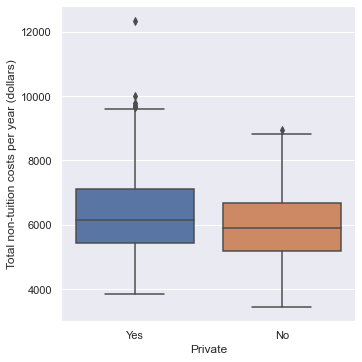

In [23]:
# Side-by-side boxplots for public vs private schools
ax = sns.catplot(x = "Private", y = "NonTuitionCosts", kind = "box", order = ["Yes", "No"],data = college)
ax.set(ylabel = "Total non-tuition costs per year (dollars)")
plt.show()

In [24]:
# Generate numerical summary of non-tuition costs by public vs private schools
college["NonTuitionCosts"].groupby(by = college["Private"]).describe()

count         mean          std     min      25%     50%     75%  \
Private                                                                     
No       212.0  5979.599057  1106.478143  3452.0  5205.25  5912.0  6692.5   
Yes      565.0  6348.090265  1240.712533  3850.0  5440.00  6140.0  7110.0   

             max  
Private           
No        8946.0  
Yes      12330.0

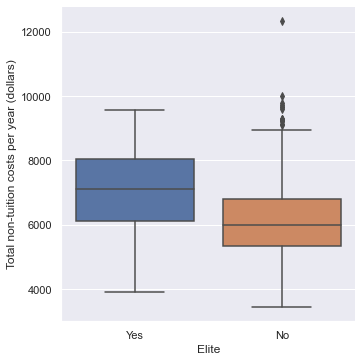

In [25]:
# Side-by-side boxplots for elite vs non-elite schools
ax = sns.catplot(x = "Elite", y = "NonTuitionCosts", kind = "box", order = ["Yes", "No"], data = college)
ax.set(ylabel = "Total non-tuition costs per year (dollars)")
plt.show()

In [26]:
# Generate numerical summary of non-tuition costs by elite vs non-elite schools
college["NonTuitionCosts"].groupby(by = college["Elite"]).describe()

count         mean          std     min     25%     50%      75%  \
Elite                                                                     
No     699.0  6150.207439  1176.361134  3452.0  5333.0  6000.0  6812.50   
Yes     78.0  7119.884615  1225.129423  3923.0  6132.5  7116.5  8039.75   

           max  
Elite           
No     12330.0  
Yes     9574.0

Based on the above box plots, it looks like that, aside from some outlier schools with very high costs, there isn't a wide gap for the median non-tution costs between private schools and public schools. The box plots do show, though, that there is a distinct difference in median non-tuition costs between elite and non-elite schools, with elite schools having higher costs.

In [27]:
# Make a column for the acceptance rate of each school
college["AcceptPerc"] = college["Accept"] / college["Apps"] * 100

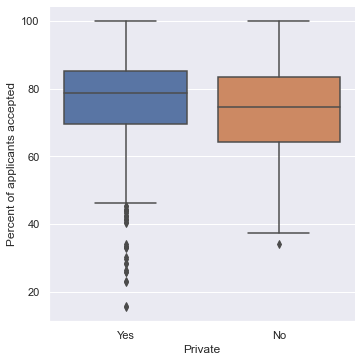

In [28]:
# Side-by-side boxplots for public vs private schools
ax = sns.catplot(x = "Private", y = "AcceptPerc", kind = "box", order = ["Yes", "No"], data = college)
ax.set(ylabel = "Percent of applicants accepted")
plt.show()

In [29]:
# Generate numerical summary of acceptance rates by public vs private schools
college["AcceptPerc"].groupby(by = college["Private"]).describe()

count       mean        std        min        25%        50%  \
Private                                                                 
No       212.0  72.653048  14.648225  33.970598  64.118423  74.433872   
Yes      565.0  75.458118  14.673495  15.448631  69.490555  78.856526   

               75%    max  
Private                    
No       83.422508  100.0  
Yes      85.102740  100.0

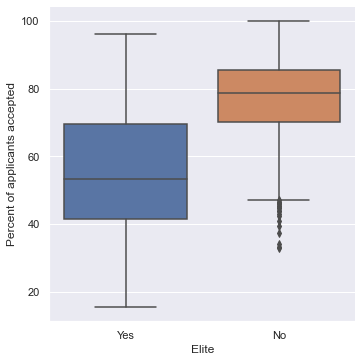

In [30]:
# Side-by-side boxplots for elite vs non-elite schools
ax = sns.catplot(x = "Elite", y = "AcceptPerc", kind = "box", order = ["Yes", "No"], data = college)
ax.set(ylabel = "Percent of applicants accepted")
plt.show()

In [31]:
# Generate numerical summary of acceptance rates by elite vs non-elite schools
college["AcceptPerc"].groupby(by = college["Elite"]).describe()

count       mean        std        min        25%        50%  \
Elite                                                                 
No     699.0  76.963792  12.171870  32.833333  70.134188  78.805395   
Yes     78.0  54.340927  19.272042  15.448631  41.527651  53.299434   

             75%         max  
Elite                         
No     85.480382  100.000000  
Yes    69.588272   96.047431

The boxplots show that while the median acceptance rates for both private and public schools are pretty close at around 75-80%, private schools have a much wider range of acceptance rates (going down to a minimum of 15.45%). When we distinguish between elite and non-elite schools, elite schools have a much lower median acceptance rate compared to non-elite ones.

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Histograms of percent of alumni who donate by school type')

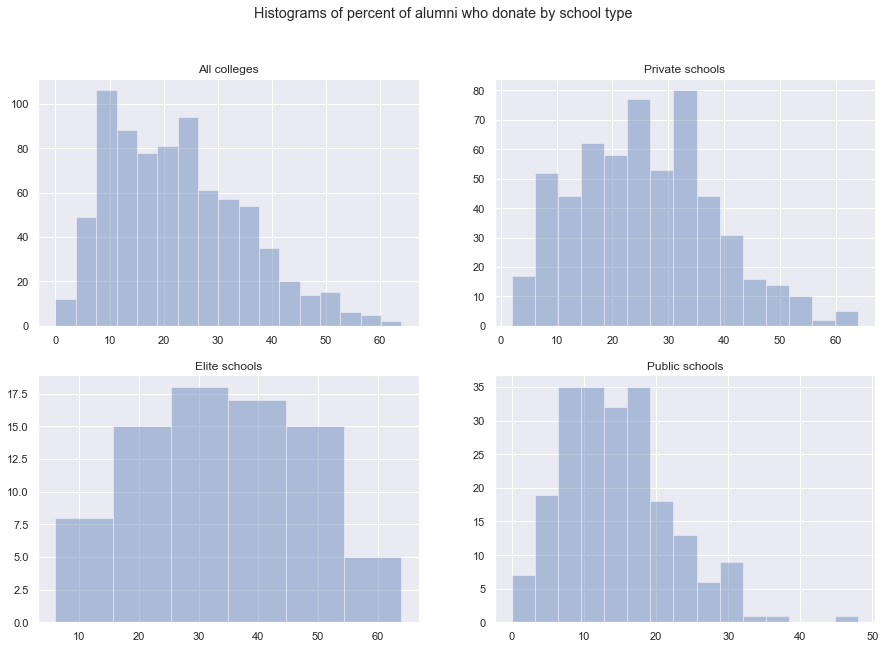

In [32]:
# Create grid of plots (fig)
# ax will be an array of four Axes objects
# Set the figure size so the plots aren't all squished together
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

# Create histogram for percent of alumni who donate across all colleges
sns.distplot(college["perc.alumni"], kde = False, ax = axes[0, 0])
axes[0, 0].set(xlabel = "", title = "All colleges")

# Create histogram for percent of alumni who donate at private colleges
sns.distplot(college.loc[college["Private"] == "Yes", "perc.alumni"], kde = False, ax = axes[0, 1])
axes[0, 1].set(xlabel = "", title = "Private schools")

# Create histogram for percent of alumni who donate at elite colleges
sns.distplot(college.loc[college["Elite"] == "Yes", "perc.alumni"], kde = False, ax = axes[1, 0])
axes[1, 0].set(xlabel = "", title = "Elite schools")

# Create histogram for percent of alumni who donate at public colleges
sns.distplot(college.loc[college["Private"] == "No", "perc.alumni"], kde = False, ax = axes[1, 1])
axes[1, 1].set(xlabel = "", title = "Public schools")

fig.suptitle("Histograms of percent of alumni who donate by school type")

In [33]:
# Generate numerical summary of percent of alumni who donate by public vs private schools
college["perc.alumni"].groupby(by = college["Private"]).describe()

count       mean        std  min   25%   50%   75%   max
Private                                                          
No       212.0  14.358491   7.518935  0.0   9.0  13.5  19.0  48.0
Yes      565.0  25.890265  12.400755  2.0  16.0  25.0  34.0  64.0

In [34]:
# Generate numerical summary of percent of alumni who donate by elite vs non-elite schools
college["perc.alumni"].groupby(by = college["Elite"]).describe()

count       mean        std  min   25%   50%    75%   max
Elite                                                           
No     699.0  21.492132  11.546512  0.0  12.0  20.0  30.00  60.0
Yes     78.0  33.961538  14.045790  6.0  23.0  33.5  44.75  64.0

Based on the above histograms, private schools and elite schools tend to have a higher percent of alumni who donate.

Lastly, I explore some factors which might be related to graduation rates.

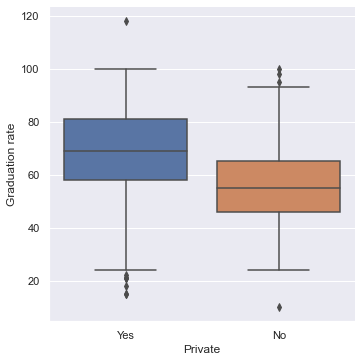

In [35]:
# Side-by-side boxplots for public vs private schools
ax = sns.catplot(x = "Private", y = "Grad.Rate", kind = "box", order = ["Yes", "No"], data = college)
ax.set(ylabel = "Graduation rate")
plt.show()

In [36]:
# Generate numerical summary of graduation rate by public vs private schools
college["Grad.Rate"].groupby(by = college["Private"]).describe()

count       mean        std   min   25%   50%   75%    max
Private                                                            
No       212.0  56.042453  14.583412  10.0  46.0  55.0  65.0  100.0
Yes      565.0  68.998230  16.749457  15.0  58.0  69.0  81.0  118.0

First, we note that while the range of graduation rates is about the same between public and private schools (I think the point with a value of 118 is a typo, since it is impossible to have a graduation rate that is above 100%), private schools generally have higher graduation rates than public ones.

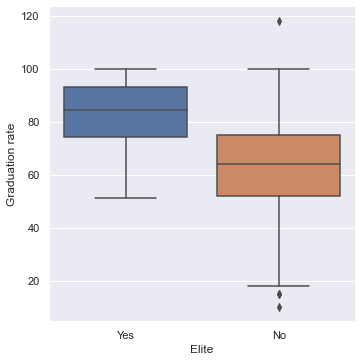

In [37]:
# Side-by-side boxplots for elite vs non-elite schools
ax = sns.catplot(x = "Elite", y = "Grad.Rate", kind = "box", order = ["Yes", "No"], data = college)
ax.set(ylabel = "Graduation rate")
plt.show()

In [38]:
# Generate numerical summary of graduation rate by elite vs non-elite schools
college["Grad.Rate"].groupby(by = college["Elite"]).describe()

count       mean        std   min    25%   50%   75%    max
Elite                                                             
No     699.0  63.463519  16.469466  10.0  52.00  64.0  75.0  118.0
Yes     78.0  83.384615  12.380578  51.0  74.25  84.5  93.0  100.0

The difference is even more striking when comparing elite and non-elite schools. Th minimum graduation rate among elite schools is almost exactly equal to the first quartile for non-elite schools.

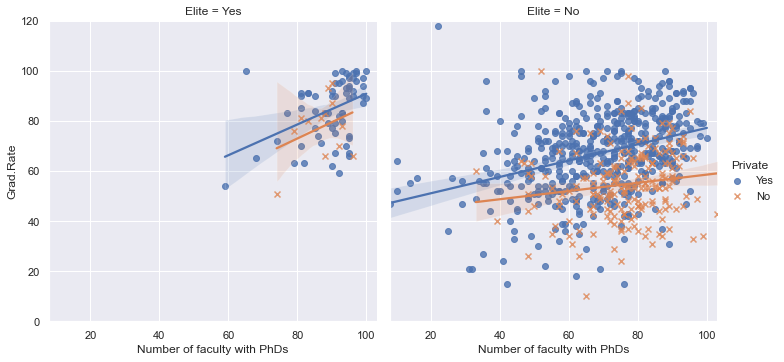

In [39]:
# Create pair of scatter plots analyzing the relationship between number of faculty with PhDs and graduation rates
# Include least squares regression lines to help distinguish between different facets of the data
# Use columns to distinguish between elite and non-elite schools
# Use hue to distinguish between public and private schools
g = sns.lmplot(x = "PhD", y = "Grad.Rate", hue = "Private", col = "Elite", col_order = ["Yes", "No"],
               markers = ["o", "x"], data = college)
g.set(xlabel = "Number of faculty with PhDs", ylim = (0, 120))
plt.show()

Next, we look at the the relationship between number of faculty with PhDs and graduation rates. There is a pretty clear positive relationship between the two for elite schools, and while the relationship is weaker for non-elite ones, there still appears to be one. Also, there seems to be a sharper increase in graduation rates per additional faculty member with a PhD for private schools when compared to public schools.

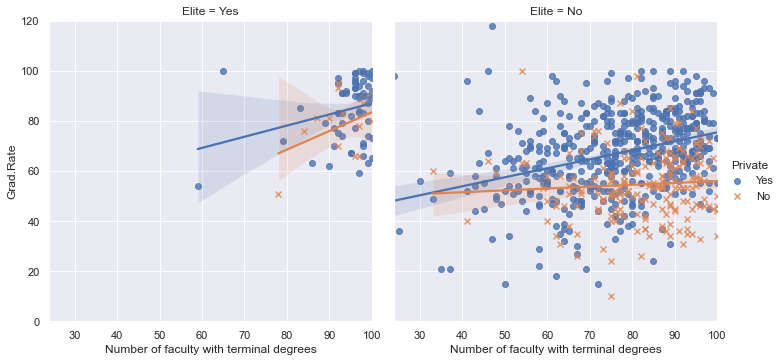

In [40]:
# Create pair of scatter plots analyzing the relationship between number of faculty with terminal degrees and graduation rates
# Use columns to distinguish between elite and non-elite schools
# Include least squares regression lines to help distinguish between different facets of the data
# Use hue to distinguish between public and private schools
g = sns.lmplot(x = "Terminal", y = "Grad.Rate", hue = "Private", col = "Elite", col_order = ["Yes", "No"],
                markers = ["o", "x"], data = college)
g.set(xlabel = "Number of faculty with terminal degrees", ylim = (0, 120))
plt.show()

The trend is similar for the relationship between number of faculty with terminal degrees at elite schools, though for non-elite schools the relationship appears to be even weaker. This especially appears to be the case for non-elite public schools.

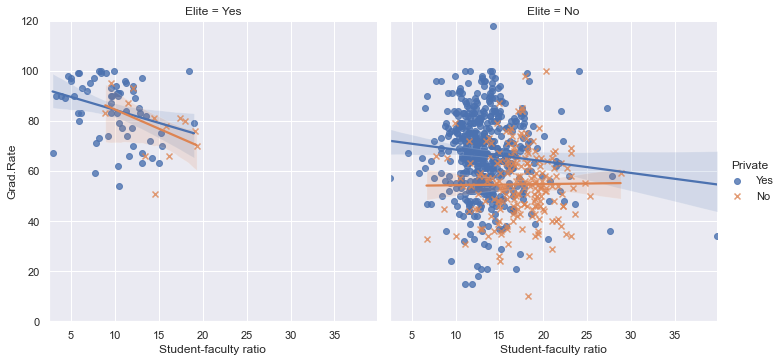

In [41]:
# Create pair of scatter plots analyzing the relationship between student-faculty ratio and graduation rates
# Include least squares regression lines to help distinguish between different facets of the data
# Use columns to distinguish between elite and non-elite schools
# Use hue to distinguish between public and private schools
g = sns.lmplot(x = "S.F.Ratio", y = "Grad.Rate", hue = "Private", col = "Elite", col_order = ["Yes", "No"],
                markers = ["o", "x"], data = college)
g.set(xlabel = "Student-faculty ratio", ylim = (0, 120))
plt.show()

Next we move on to looking at the relationship between student-facult ratio and graduation rate. We can see generally negative relationships between the two variables for both elite and non-elite schools. In other words, as the ratio increases, graduation rates tend to decrease. The relationship seems to have a steeper slope for non-elite private schools, while there doesn't appear to be much of a relationship at all for non-elite public schools.

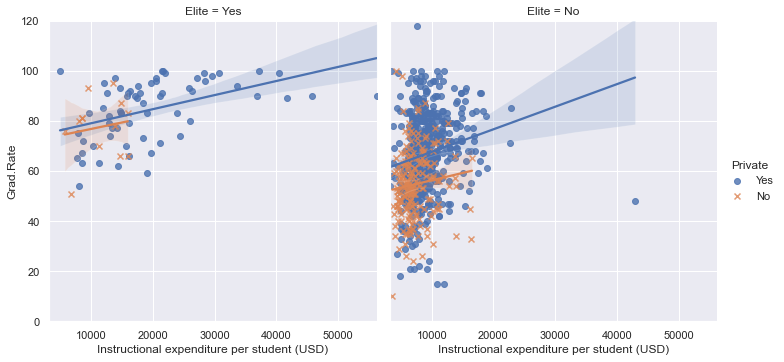

In [42]:
# Create pair of scatter plots analyzing the relationship between instructional expenditure per student and graduation rates
# Include least squares regression lines to help distinguish between different facets of the data
# Use columns to distinguish between elite and non-elite schools
# Use hue to distinguish between public and private schools
g = sns.lmplot(x = "Expend", y = "Grad.Rate", hue = "Private", col = "Elite", col_order = ["Yes", "No"], 
               markers = ["o", "x"], data = college)
g.set(xlabel = "Instructional expenditure per student (USD)", ylim = (0, 120))
plt.show()

Lastly, we look at the relationship between instructional expenditure per student. For both elite and non-elite schools, there is a clear positive relationship between instructional expenditure per student and graduation rate, though the effect does flatten out after a certain point. The slope seems to be steeper for non-elite public schools compared to non-elite private schools. Also, there is a clear outlier and high leverage point: a non-elite private school with a very low graduation rate compared to its instructional expenditure per student.

***

### Question 5 
#### This exercise involves the [Auto](https://www.statlearning.com/s/Auto.csv) data set studied in the lab. Make sure that the missing values have been removed from the data.

In [43]:
# Load the Auto data set into a Pandas dataframe, treating question marks as na values
auto = pd.read_csv("https://www.statlearning.com/s/Auto.csv", na_values = ["?"])
# Drop the rows which contain missing values (safe to do since we've worked with this data in a previous lab)
auto.dropna(inplace = True)
# Check the dimensions of the dataframe
auto.shape

(392, 9)

#### (a) Which of the predictors are quantitative, and which are qualitative?

In [44]:
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

The quantitative variables are `mpg`, `displacement`, `horsepower`, `weight`, and `acceleration`. Depending on the context, we may want to treat `cylinders` and `year` as `quantitative` predictors or `qualitative `ones. Lastly, `origin` and `name` are qualitative predictors. origin is a quantitative encoding of a car's country of origin, where `1` being *American*, `2` being *European*, and `3` being *Japanese*.

#### (b) What is the *range* of each quantitative predictor? You can answer this using the `max()` and `min()` functions.

In [45]:
# Range = max - min
# Use the max() and min() functions on just the numeric data
# The argument axis = 0 means that we compute the max/min along each index
auto_max = auto.loc[:, "mpg":"year"].max(axis = 0)
auto_min = auto.loc[:, "mpg":"year"].min(axis = 0)
auto_range = auto_max - auto_min
# Generate a dataframe with the max, min, and range for each quantitative variable
pd.DataFrame({"max":auto_max, "min":auto_min, "range":auto_range})

max     min   range
mpg             46.6     9.0    37.6
cylinders        8.0     3.0     5.0
displacement   455.0    68.0   387.0
horsepower     230.0    46.0   184.0
weight        5140.0  1613.0  3527.0
acceleration    24.8     8.0    16.8
year            82.0    70.0    12.0

#### (c) What is the mean and standard deviation of each quantitative predictor?

In [46]:
# Compute mean of each quantitative variable
auto_mean = auto.loc[:, "mpg":"year"].mean(axis = 0)
# Compute standard deviation of each quantitative variable
auto_sd = auto.loc[:, "mpg":"year"].std(axis = 0)
# Generate a dataframe with the mean and standard deviation of each quantitative predictor
# Note that I also could have used the describe() function as well
pd.DataFrame({"mean":auto_mean, "std dev":auto_sd})

mean     std dev
mpg             23.445918    7.805007
cylinders        5.471939    1.705783
displacement   194.411990  104.644004
horsepower     104.469388   38.491160
weight        2977.584184  849.402560
acceleration    15.541327    2.758864
year            75.979592    3.683737

#### (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [47]:
# Reset the index of the auto data frame
auto.reset_index(drop = True, inplace = True)
# Create dataframe in which the 10th through 85th observations are dropped
# Don't forget that Pandas dataframes are zero-indexed
auto_dropped = auto.drop(index = list(range(9, 85)))
# Compute max, min, range, mean, and standard deviation for each quantitative variable
dropped_max = auto_dropped.loc[:, "mpg":"year"].max(axis = 0)
dropped_min = auto_dropped.loc[:, "mpg":"year"].min(axis = 0)
dropped_range = dropped_max - dropped_min
dropped_mean = auto_dropped.loc[:, "mpg":"year"].mean(axis = 0)
dropped_sd = auto_dropped.loc[:, "mpg":"year"].std(axis = 0)
# Generate a dataframe with the max, min, range, mean, and standard deviation for each quantitative variable
# Again note that the describe() function would provide all of these values except for the range
pd.DataFrame({"max":dropped_max, "min":dropped_min, "range":dropped_range, "mean":dropped_mean, "std dev":dropped_sd})

max     min   range         mean     std dev
mpg             46.6    11.0    35.6    24.404430    7.867283
cylinders        8.0     3.0     5.0     5.373418    1.654179
displacement   455.0    68.0   387.0   187.240506   99.678367
horsepower     230.0    46.0   184.0   100.721519   35.708853
weight        4997.0  1649.0  3348.0  2935.971519  811.300208
acceleration    24.8     8.5    16.3    15.726899    2.693721
year            82.0    70.0    12.0    77.145570    3.106217

#### (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

In [48]:
# Convert the origin column from numerical codes to the meanings of each code
# 1 = American, 2 = European, 3 = Japanese
origin_dict = {1: "American", 2: "European", 3: "Japanese"}
auto["origin"] = auto["origin"].transform(lambda x: origin_dict[x]).astype("category")

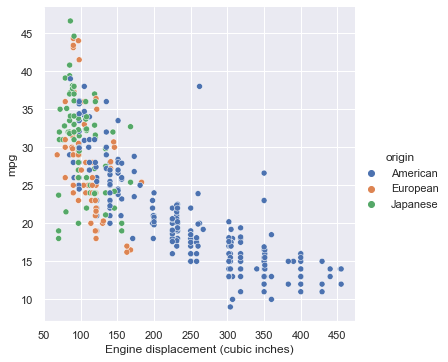

In [49]:
# Create scatter plot for the relationship between engine displacement and mpg
# Use hue to highlight the origin of each car
g = sns.relplot(x = "displacement", y = "mpg", hue = "origin", data = auto)
g.set(xlabel = "Engine displacement (cubic inches)")
plt.show()

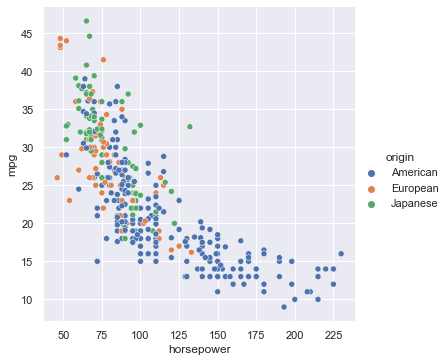

In [50]:
# Create scatter plot for the relationship between horsepower and mpg
# Use hue to highlight the origin of each car
g = sns.relplot(x = "horsepower", y = "mpg", hue = "origin", data = auto)
plt.show()

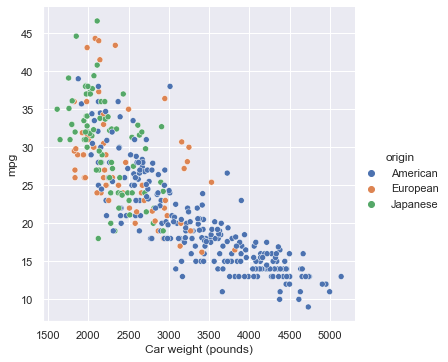

In [51]:
# Create scatter plot for the relationship between car weight and mpg
# Use hue to highlight the origin of each car
g = sns.relplot(x = "weight", y = "mpg", hue = "origin", data = auto)
g.set(xlabel = "Car weight (pounds)")
plt.show()

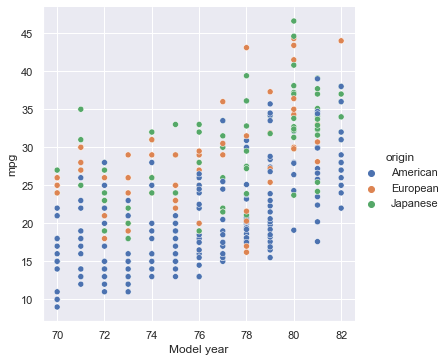

In [52]:
# Create scatter plot for the relationship between model year and mpg
# Use hue to highlight the origin of each car
g = sns.relplot(x = "year", y = "mpg", hue = "origin", data = auto)
g.set(xlabel = "Model year")
plt.show()

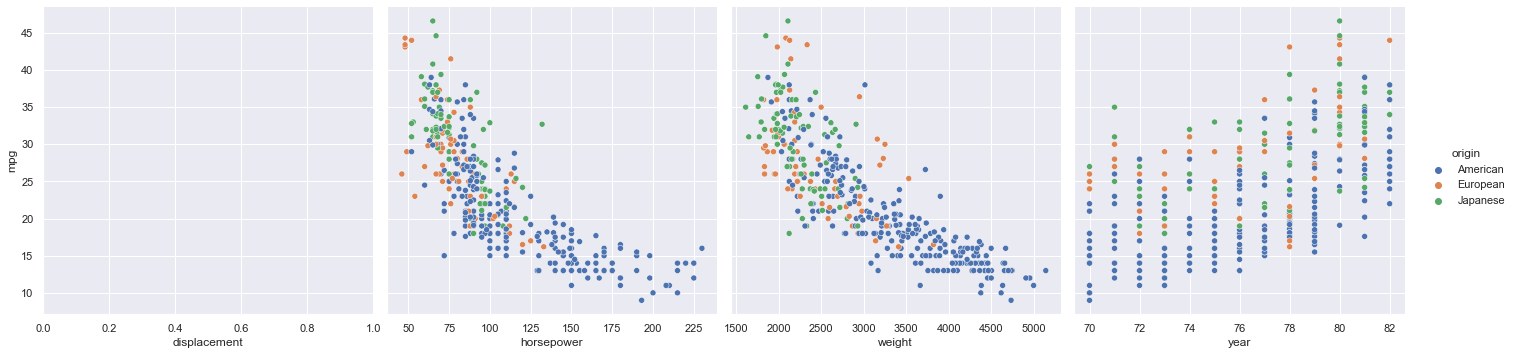

In [53]:
# Alternatively use pairplot to create scatterplots relating mpg to engine displacement, horsepower,
# car weight, and car manufacture year
# Use hue to highlight the origin of each car
g = sns.pairplot(auto, hue = "origin", y_vars = ["mpg"], x_vars = ["displacement", "horsepower", "weight", "year"],
                height = 5)

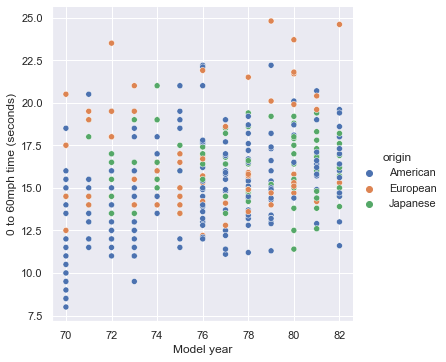

In [54]:
# Create scatter plot for the relationship between model year and acceleration
# Use hue to highlight the origin of each car
g = sns.relplot(x = "year", y = "acceleration", hue = "origin", data = auto)
g.set(xlabel = "Model year", ylabel = "0 to 60mph time (seconds)")
plt.show()

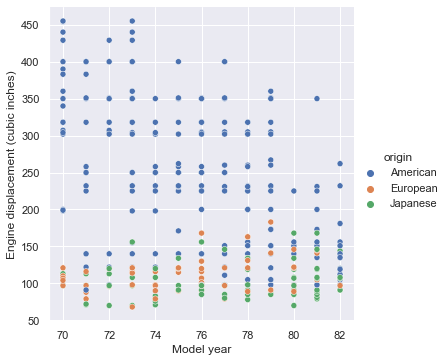

In [55]:
# Create scatter plot for the relationship between model year and engine displacement
# Use hue to highlight the origin of each car
g = sns.relplot(x = "year", y = "displacement", hue = "origin", data = auto)
g.set(xlabel = "Model year", ylabel = "Engine displacement (cubic inches)")
plt.show()

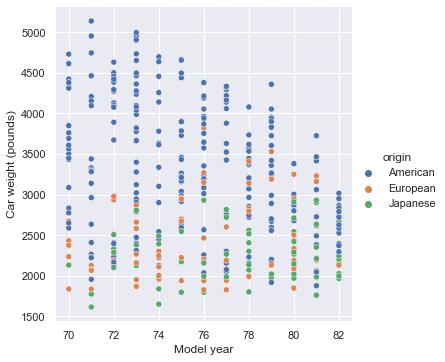

In [56]:
# Create scatter plot for the relationship between model year and car weight
# Use hue to highlight the origin of each car
g = sns.relplot(x = "year", y = "weight", hue = "origin", data = auto)
g.set(xlabel = "Model year", ylabel = "Car weight (pounds)")
plt.show()

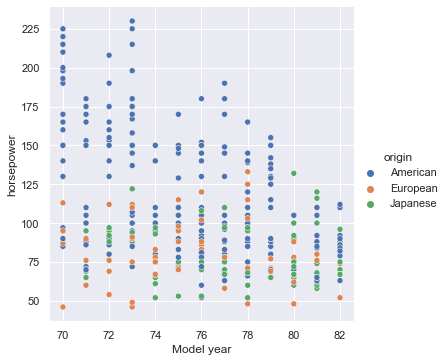

In [57]:
# Create scatter plot for the relationship between model year and horsepower
# Use hue to highlight the origin of each car
g = sns.relplot(x = "year", y = "horsepower", hue = "origin", data = auto)
g.set(xlabel = "Model year", ylabel = "horsepower")
plt.show()

Looking at how various car characteristics change with model year, we see that there aren't any strong relationships. There are still some weak relationships, such as max engine displacement, car weight, and horsepower generally decreasing from 1970 to 1982. From a historical perspective, these changes could be in response to the 1973 and 1979 oil crises, in which spikes in oil prices pushed auto manufacturers to take measures to improve the efficiency of their cars.

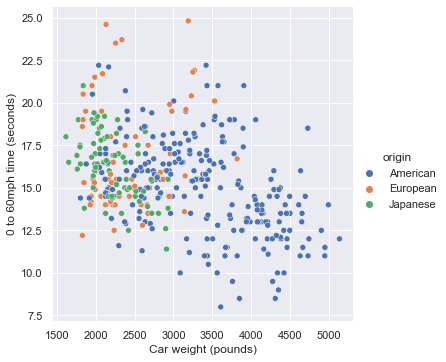

In [58]:
# Create scatter plot for the relationship between car weight and acceleration
# Use hue to highlight the origin of each car
g = sns.relplot(x = "weight", y = "acceleration", hue = "origin", data = auto)
g.set(xlabel = "Car weight (pounds)", ylabel = "0 to 60mph time (seconds)")
plt.show()

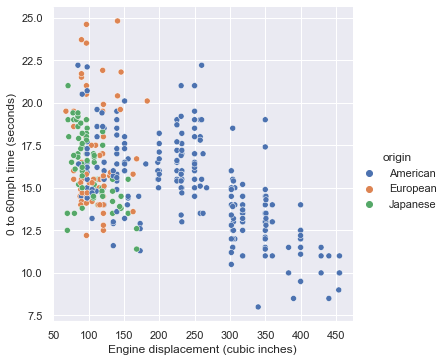

In [59]:
# Create scatter plot for the relationship between engine displacement and acceleration
# Use hue to highlight the origin of each car
g = sns.relplot(x = "displacement", y = "acceleration", hue = "origin", data = auto)
g.set(xlabel = "Engine displacement (cubic inches)", ylabel = "0 to 60mph time (seconds)")
plt.show()

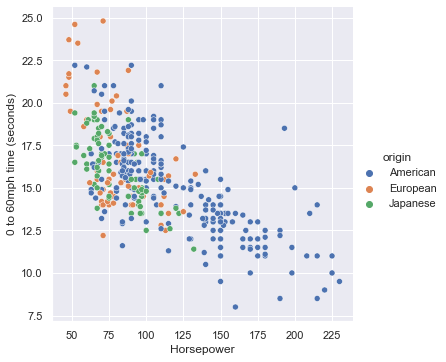

In [60]:
# Create scatter plot for the relationship between horsepower and acceleration
# Use hue to highlight the origin of each car
g = sns.relplot(x = "horsepower", y = "acceleration", hue = "origin", data = auto)
g.set(xlabel = "Horsepower", ylabel = "0 to 60mph time (seconds)")
plt.show()

D:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


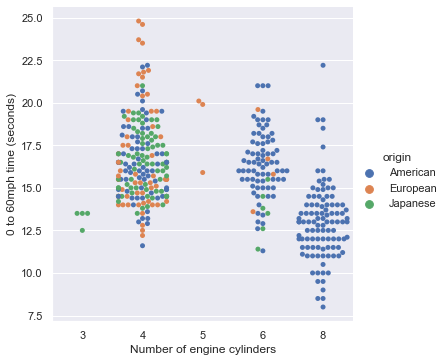

In [61]:
# Create swarm plot for the relationship between number of engine cylinders and acceleration
# Use hue to highlight the origin of each car
g = sns.catplot(x = "cylinders", y = "acceleration", hue = "origin", data = auto, kind = "swarm")
g.set(xlabel = "Number of engine cylinders", ylabel = "0 to 60mph time (seconds)")
plt.show()

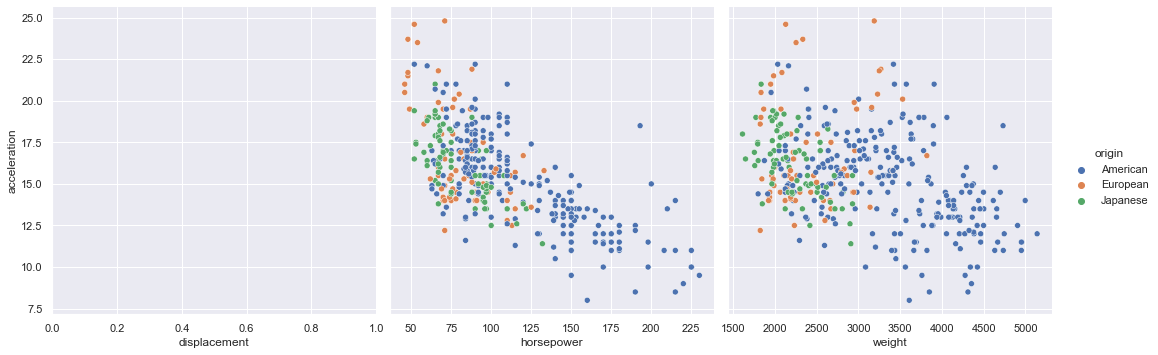

In [62]:
# Alternatively use pairplot to create scatterplots relating acceleration to engine displacement, horsepower,
# car weight
# Use hue to highlight the origin of each car
g = sns.pairplot(auto, hue = "origin", y_vars = ["acceleration"], x_vars = ["displacement", "horsepower", "weight"],
                height = 5)

Next, I explored the relationship between the number of seconds it takes a car to accelerate from 0 to 60 miles per hour and a number of different factors. As expected, the 0-to-60 time clearly decreases with increased engine displacement and increased horsepower. There is also a weak relationship that as the number of engine cylinders increases the 0-to-60 time tends to decrease. While it may seem counter-intuitive at first, the 0-to-60 time also tends to decrease with car weight. This makes more sense in the context of the two scatterplots below, which shows that the higher weight is correlated with higher horsepower and higher engine displacement.

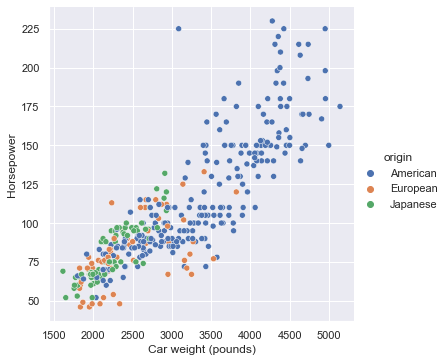

In [63]:
# Create scatter plot for the relationship between car weight and horsepower
# Use hue to highlight the origin of each car
g = sns.relplot(x = "weight", y = "horsepower", hue = "origin", data = auto)
g.set(xlabel = "Car weight (pounds)", ylabel = "Horsepower")
plt.show()

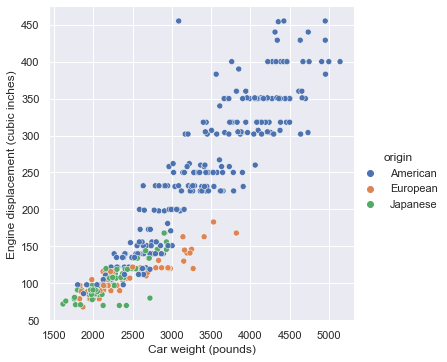

In [64]:
# Create scatter plot for the relationship between car weight and engine displacement
# Use hue to highlight the origin of each car
g = sns.relplot(x = "weight", y = "displacement", hue = "origin", data = auto)
g.set(xlabel = "Car weight (pounds)", ylabel = "Engine displacement (cubic inches)")
plt.show()

#### (f) Suppose that we wish to predict gas mileage (`mpg`) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

Based on the scatter plots in part (e) which relate miles per gallon to the predictors engine displacement, horsepower, car weight, and model year, it seems as if the first three factors would be most helpful in predicting mpg, with model year still potentially being helpful but less so. There are clear relationships that increasing engine displacement/horsepower/car weight results in decreased fuel efficiency. There is also a weak relationship that fuel efficiency generally increased going from 1970 to 1982.

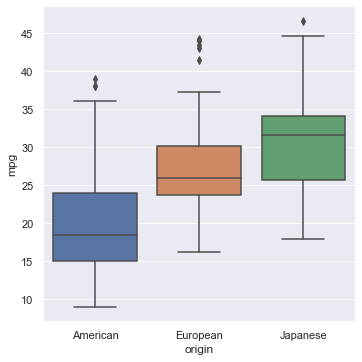

In [65]:
# Create box plot comparing the fuel effiency of American, European, and Japanese cars
g = sns.catplot(x = "origin", y = "mpg", data = auto, kind = "box")

Looking at the above box plot, we can also see that there is a relationship between a car's country of origin and fuel efficiency, where on average Japanese cars are the most efficient, followed by European cars and then by American cars. Looking at the numerical summary below also confirms this and provides some additional insight. As we might have noticed in the scatter plots relating mpg to various other factors, Japanese cars tend to have engines with lower displacement that produce less power. The numerical summary below indicates that the average displacement and average horsepower for Japanese cars are quite close to the corresponding values for European cars. Moreover, Japanese cars are on average about 200 pounds lighter than European cars, and about 1150 pounds lighter than American cars. Especially when combined with the effects engine displacement, horsepower, and car weight appear to have on fuel efficiency, as noted above, it seems that the fact that the Japanese cars in this data set are lightweight cars with small and low-powered engines is the reason why those cars are generally more fuel efficient than American and European ones.

In [66]:
auto.loc[:, "mpg":"acceleration"].groupby(auto["origin"]).agg(["mean", "std", "min", "median", "max"]).T

origin                  American     European     Japanese
mpg          mean      20.033469    27.602941    30.450633
             std        6.440384     6.580182     6.090048
             min        9.000000    16.200000    18.000000
             median    18.500000    26.000000    31.600000
             max       39.000000    44.300000    46.600000
cylinders    mean       6.277551     4.161765     4.101266
             std        1.655996     0.506975     0.590414
             min        4.000000     4.000000     3.000000
             median     6.000000     4.000000     4.000000
             max        8.000000     6.000000     6.000000
displacement mean     247.512245   109.632353   102.708861
             std       98.376347    22.693220    23.140126
             min       85.000000    68.000000    70.000000
             median   250.000000   105.000000    97.000000
             max      455.000000   183.000000   168.000000
horsepower   mean     119.048980    80.558824    79.835443
             std       39.897790    20.157871    17.819199
             min       52.000000    46.000000    52.000000
             median   105.000000    76.500000    75.000000
             max      230.000000   133.000000   132.000000
weight       mean    3372.489796  2433.470588  2221.227848
             std      795.346690   491.813867   320.497248
             min     1800.000000  1825.000000  1613.000000
             median  3381.000000  2240.000000  2155.000000
             max     5140.000000  3820.000000  2930.000000
acceleration mean      14.990204    16.794118    16.172152
             std        2.736020     3.087813     1.954937
             min        8.000000    12.200000    11.400000
             median    15.000000    15.600000    16.400000
             max       22.200000    24.800000    21.000000

***

### Question 6
#### This exercise involves the [Boston](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) housing data set.

__Note:__ Instead of using the Boston data set found in the MASS library in R, I will instead be using the corrected Boston data set, which can be downloaded [here](http://lib.stat.cmu.edu/datasets/boston_corrected.txt).

#### (a) To begin, load the Boston data set.

```
pd.read_table("http://lib.stat.cmu.edu/datasets/boston_corrected.txt",skiprows=9,sep='\t',index_col= ["TOWN#","TOWN", "TRACT"])
```

#### How many rows are in this data set? How many columns? What do the rows and columns represent?

In [67]:
boston=pd.read_table("http://lib.stat.cmu.edu/datasets/boston_corrected.txt",skiprows=9,sep='\t',index_col= ["TOWN#","TOWN", "TRACT"])
boston.head()

OBS.     LON      LAT  MEDV  CMEDV     CRIM    ZN  \
TOWN# TOWN       TRACT                                                      
0     Nahant     2011      1 -70.955  42.2550  24.0   24.0  0.00632  18.0   
1     Swampscott 2021      2 -70.950  42.2875  21.6   21.6  0.02731   0.0   
                 2022      3 -70.936  42.2830  34.7   34.7  0.02729   0.0   
2     Marblehead 2031      4 -70.928  42.2930  33.4   33.4  0.03237   0.0   
                 2032      5 -70.922  42.2980  36.2   36.2  0.06905   0.0   

                        INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
TOWN# TOWN       TRACT                                                      
0     Nahant     2011    2.31     0  0.538  6.575  65.2  4.0900    1  296   
1     Swampscott 2021    7.07     0  0.469  6.421  78.9  4.9671    2  242   
                 2022    7.07     0  0.469  7.185  61.1  4.9671    2  242   
2     Marblehead 2031    2.18     0  0.458  6.998  45.8  6.0622    3  222   
                 2032    2.18     0  0.458  7.147  54.2  6.0622    3  222   

                        PTRATIO       B  LSTAT  
TOWN# TOWN       TRACT                          
0     Nahant     2011      15.3  396.90   4.98  
1     Swampscott 2021      17.8  396.90   9.14  
                 2022      17.8  392.83   4.03  
2     Marblehead 2031      18.7  394.63   2.94  
                 2032      18.7  396.90   5.33

In [68]:
boston.shape

(506, 18)

The corrected Boston data set has 506 rows and 20 columns. Each row represents a particular tract of land within the city of Boston. The dataset has the following columns.

 - `TOWN`: Name of the town in which the tract is located
 - `TOWNNO`: Numeric code corresponding to the town
 - `TRACT`: ID number of the tract of land
 - `LON`: Longitude of the tract in decimal degrees
 - `LAT`: Latitude of the tract in decimal degrees
 - `MEDV`: Median value of owner-occupied housing in \\$1000 for the tract  
 
 - `CMEDV`: Corrected median value of owner occupied housing in \\$1000 for the tract, since the original values in MEDV were censored in the sense that all median values at or over \\$50000 are set to \\$50000
 
 - `CRIM`: Per capita crime rate for the tract
 - `ZN`: Percent of residential land zoned for lots over 25000 square feet per town (constant for all tracts within the same town)
 - `INDUS`: Percent of non-retail business acres per town (constant for all tracts within the same town)
 - `CHAS`: Dummy variable to indicate whether or not the tract borders the Charles River (1 = Borders Charles River, 0 = Otherwise)
 - `NOX`: Nitric oxides concentration (in parts per 10 million) per town (constant for all tracts within the same town)
 - `RM`: Average number of rooms per dwelling in the tract
 - `AGE`: Percent of owner-occupied units in the tract built prior to 1940
 - `DIS`: Weighted distance from the tract to five Boston employment centers
 - `RAD`: Index of accessibility to radial highways per town (constant for all tracts within the same town)
 - `TAX`: Full-value property tax rate per \\$10000 per town (constant for all tracts within the same town)
 - `PTRATIO`: Pupil-teacher ratio per town (constant for all tracts within the same town)
 - `B`:  $1000(B−0.63)^2$ , where $B$  is the proportion of black residents in the tract
 - `LSTAT`: Percent of tract population designated as lower status

In [69]:
# Since I won't be using them, I'll drop the LON, LAT, OBS.,and MEDV columns
boston.drop(columns = ["LON", "LAT", "OBS.", "MEDV"], inplace = True)
boston.head()

CMEDV     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE  \
TOWN# TOWN       TRACT                                                          
0     Nahant     2011    24.0  0.00632  18.0   2.31     0  0.538  6.575  65.2   
1     Swampscott 2021    21.6  0.02731   0.0   7.07     0  0.469  6.421  78.9   
                 2022    34.7  0.02729   0.0   7.07     0  0.469  7.185  61.1   
2     Marblehead 2031    33.4  0.03237   0.0   2.18     0  0.458  6.998  45.8   
                 2032    36.2  0.06905   0.0   2.18     0  0.458  7.147  54.2   

                           DIS  RAD  TAX  PTRATIO       B  LSTAT  
TOWN# TOWN       TRACT                                            
0     Nahant     2011   4.0900    1  296     15.3  396.90   4.98  
1     Swampscott 2021   4.9671    2  242     17.8  396.90   9.14  
                 2022   4.9671    2  242     17.8  392.83   4.03  
2     Marblehead 2031   6.0622    3  222     18.7  394.63   2.94  
                 2032   6.0622    3  222     18.7  396.90   5.33

#### (b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

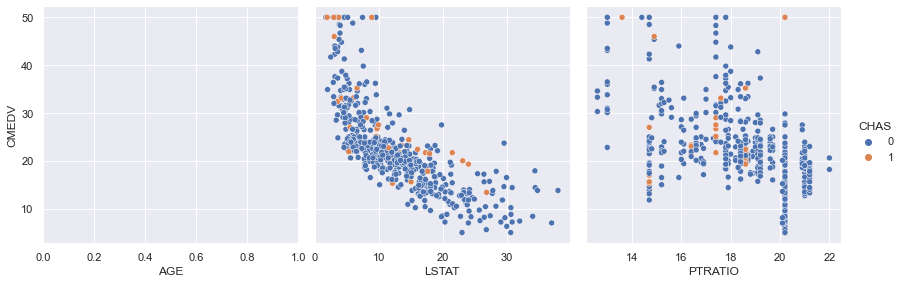

In [70]:
# Use pairplot to create a trio of scatterplots relating median home value with
# percent of home built prior to 1940, percent of lower socioeconomic status residents, and pupil-teacher ratio
g = sns.pairplot(boston, x_vars = ["AGE", "LSTAT", "PTRATIO"], y_vars = ["CMEDV"], height = 4,hue="CHAS")

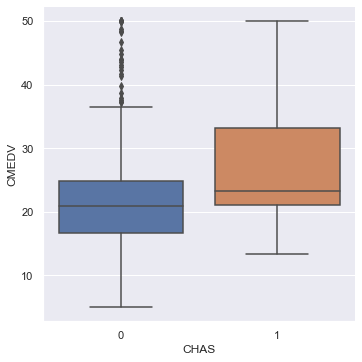

In [71]:
# Use catplot to create a boxplot comparing the median home values between tracts
# bordering the Charles River and those which do not
g = sns.catplot(x = "CHAS", y = "CMEDV", kind = "box", order = [0, 1], data = boston)

First, I generated some plots to explore the relationship between median home value and a number of non-crime factors. There aren't any especially clear patterns I can discern from thes plots aside from the expected result that as a tracts with higher median home values have a greater proportion of lower-status residence. Also, it appears as if tracts that border the Charles river are a high a slightly higher median home value on average.

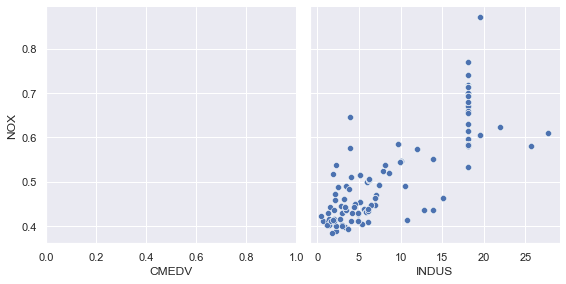

In [72]:
# Use pairplot to create a pair of scatter plots to relate the concentration of nitric oxides with median home value
# and percent of non-retail business acres
g = sns.pairplot(boston, x_vars = ["CMEDV", "INDUS"], y_vars = ["NOX"], height = 4)

These two scatter plots in this next group explore factors that might relate to the concentration of nitric oxides. While there isn't a strong relationship, it appears that tracts with higher median home value also weakly tend to have lower concentrations of nitric oxides. There is a much clearer relationship with the percentage of non-retail business acres -- tracts with a higher proportion of non-retail business acres tend to have higher concentrations of nitric oxides. The next two plots look at some more factors which might be related to the median home value of a tract.

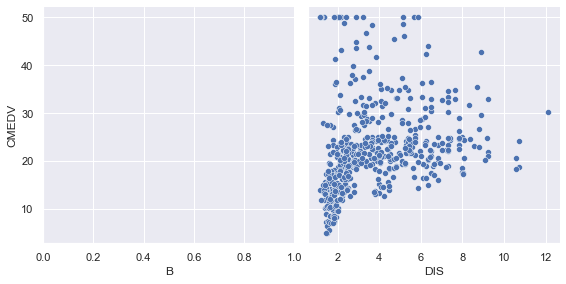

In [73]:
# Use pairplot to create a pair of scatter plots to relate the median home value to the proportion of black residents
# and the proximity to Boston employment centers
g = sns.pairplot(boston, x_vars = ["B", "DIS"], y_vars = ["CMEDV"], height = 4)

The left-hand plot seems to indicate that there is a relationship between the value of B and CMEDV, where as B increases,CMEDV increases. If I am interpreting this correctly, this means that tracts with high median home values have a very low (close to 0%) proportion of Black residents, while tracts with low median home values have a much higher proportion (close to 63%). The right-hand plot appears to indicate that there is also a relationship between proximity to Boston employment centers and median home value, with home values generally increasing as one gets further away from the employment centers.

#### (c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

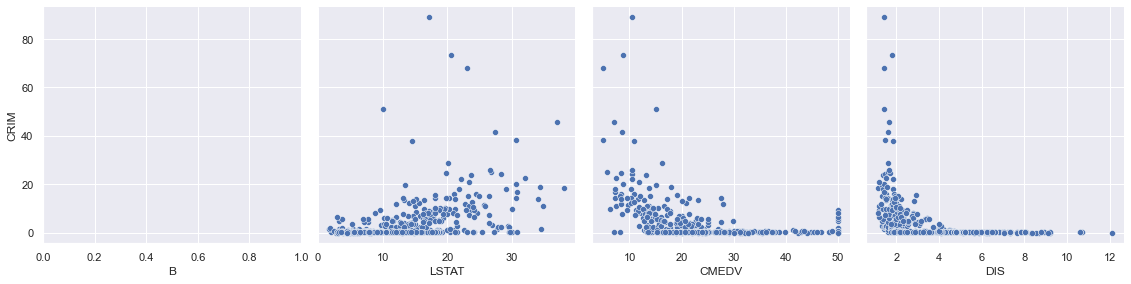

In [74]:
# Use pairplot to create a quartet of scatter plots to relate the per capita crime rate with proportion of Black residents,
# proportion of lower-status residents, median home value, and proximity to Boston employment centers
g = sns.pairplot(boston, x_vars = ["B", "LSTAT", "CMEDV", "DIS"], y_vars = ["CRIM"], height = 4)

Based on the above four scatter plots, it appears that there are pretty clear relationships between crime rate and median home value, percent of lower status residents, and proximity to Boston employment centers. Tracts with lower home values tend to have higher crime rates, as do tracts which are closer to Boston employment centers. In addiion, tracts with higher proportion of lower status residents tend to have higher crime rates. I was also curious if there would be a relationship between crime rate and `B`, which serves as some kind of measurement for the proportion of Black residents. Based on the scatter plot between those two variables, there doesn't appear to be a clear relationship.

#### (d) Do any of the census tracts of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, ''), Text(0.5, 1.0, 'Histogram of pupil-teacher ratio')]

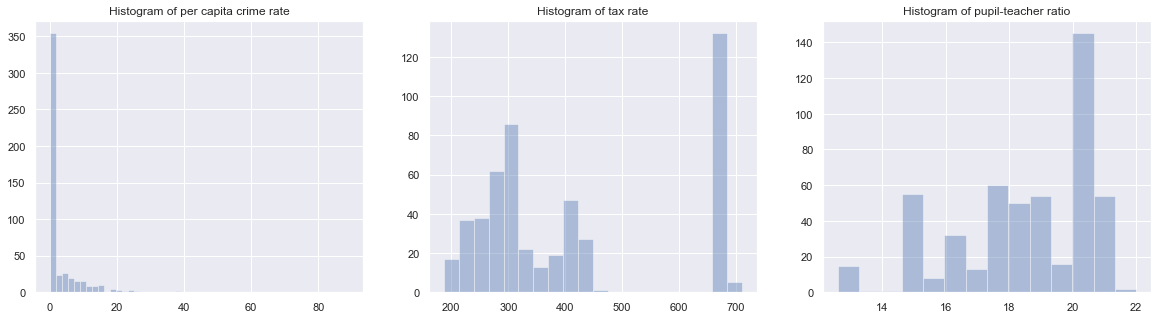

In [75]:
# Create grid of plots (fig)
# ax will be an array of three Axes objects
# Set the figure size so the plots aren't all squished together
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Create histogram for Boston crime rates
sns.distplot(boston["CRIM"], kde = False, ax = axes[0])
axes[0].set(xlabel = "", title = "Histogram of per capita crime rate")

# Create histogram for Boston tax rates
# Use more bins than the default given by the Freedman-Diaconis rule to see more of the shape of the distribution
sns.distplot(boston["TAX"], bins = 20, kde = False, ax = axes[1])
axes[1].set(xlabel = "", title = "Histogram of tax rate")

# Create histogram for Boston pupil-teacher ratios
sns.distplot(boston["PTRATIO"], kde = False, ax = axes[2])
axes[2].set(xlabel = "", title = "Histogram of pupil-teacher ratio")

In [76]:
boston.loc[:, ["CRIM", "TAX", "PTRATIO"]].describe()

CRIM         TAX     PTRATIO
count  506.000000  506.000000  506.000000
mean     3.613524  408.237154   18.455534
std      8.601545  168.537116    2.164946
min      0.006320  187.000000   12.600000
25%      0.082045  279.000000   17.400000
50%      0.256510  330.000000   19.050000
75%      3.677082  666.000000   20.200000
max     88.976200  711.000000   22.000000

Based on the histograms and the numerical summary, there do appear to be tracts within Boston which have particularly high crime rates, tax rates, or pupil-teacher ratios. The minimum crime rate is 0.00632, while the maximum is 88.97620, with a median of 0.25651. The minimum tax rate is \\$187 per \\$10000, while the maximum is \\$711, with a median of \\$330. The minimum pupil-teacher ratio is 12.60 pupils per teacher, while the maximum is 22, with a median of 19.05. Given the median value, the maximum pupil-teacher ratio in the data set isn't outrageously high, since about half of the tracts have a ratio of 19 or more.

#### (e) How many of the census tracts in this data set bound the Charles river?

In [77]:
# Use the fact that in the data set, 1 = Borders the Charles and 0 = otherwise to count the number
# of tracts which borders the Charles by summing along that column
boston["CHAS"].sum()

35

In this data set, 35 tracts neighbor the Charles river.

In [78]:
# We can use a boolean mask to only take the rows for tracts which border the Charles
# Then look at the 0-level of the multi-index to access the town names and return the unique ones
# We could then check the Index.size attribute to get the number of unique towns which border the Charles
boston[boston["CHAS"] == 1].index.unique(level = 1)

Index(['Cambridge', 'Waltham', 'Watertown', 'Newton', 'Dedham', 'Needham',
       'Wellesley', 'Dover', 'Boston Allston-Brighton', 'Boston Back Bay',
       'Boston Beacon Hill'],
      dtype='object', name='TOWN')

In [79]:
# Alternatively, we can get the level values for the 0-level of the multi-index and use the
# Index.nunique() function to return the number of unique towns which border the Charles
boston[boston["CHAS"] == 1].index.get_level_values(0).nunique()

11

From the computations above, we can see that 11 distinct towns border the Charles river: Allston-Brighton, Back Bay, Beacon Hill, Cambridge, Dedham, Dover, Newton, Needham, Waltham, Watertown, and Wellesley.

#### (f) What is the median pupil-teacher ratio among the towns in this data set?

In [80]:
boston["PTRATIO"].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

The median pupil-teacher ratio among towns in this data set is 19.05 pupils per teacher.

#### (g) Which census tract of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that census tract, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [81]:
min_medv = boston["CMEDV"].min()
boston[boston["CMEDV"] == min_medv]

CMEDV     CRIM   ZN  INDUS  CHAS    NOX  \
TOWN# TOWN                TRACT                                            
80    Boston South Boston 606      5.0  38.3518  0.0   18.1     0  0.693   
                          614      5.0  67.9208  0.0   18.1     0  0.693   

                                    RM    AGE     DIS  RAD  TAX  PTRATIO  \
TOWN# TOWN                TRACT                                            
80    Boston South Boston 606    5.453  100.0  1.4896   24  666     20.2   
                          614    5.683  100.0  1.4254   24  666     20.2   

                                      B  LSTAT  
TOWN# TOWN                TRACT                 
80    Boston South Boston 606    396.90  30.59  
                          614    384.97  22.98

Two of the tracts of South Boston have the lowest median value of owner-occupied homes, at  5000.Both of these tracts have very high crime rates compared to the overall range for that variable, with values 38.3518 and 67.9208 putting them far into the upper quartile and into the range of being outliers.These tracts have no land zoned for residential lots of 25000 sq. ft., though this is in line with at least half of the tracts in the overall set given the median for `ZN` is 0. The two tracts do have a relatively high proportion of non−retail business acres, with values of 18.1 being right at the third quartile. Similarly,the tracts also have concentrations of nitric oxides in the upper quartile of the overall set with a value of 0.693 parts per ten million. The average number of rooms per dwelling for these two tracts is at the low end, with values of 5.453 and 5.683 putting them at the bottom quartile. Next, these two tracts are among those with the highest proportion of owner−occupied homes built prior to 1940, with a value of 100.The tracts are also quite close Boston employment centers with `DIS` values of 1.4896 and 1.4254 putting them at the bottom quartile. The tracts also are very close to radial highways with the maximum value of `RAD` at 24. Next,the tracts have above average property tax rates, with a value of \\$666 per \\$10000, putting them at the third quartile. The pupil-teacher ratio of 20.2 also puts these tracts at the third quartile. The tracts have relatively high values for `B`, though one tract has a maximum value while the other, with a value of 384.97, is in between the first and second quartiles. Lastly, the tracts have a high proportion of lower status residents (values of 30.59 and 22.98), putting them in the top quartile of the data.

In summary, these two tracts with the lowest median value of owner-occupied homes have predictors generally at the extreme ends of their respective ranges.

#### (h) In this data set, how many of the census tracts average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the census tracts that average more than eight rooms per dwelling.

In [82]:
# Use the fact that when summing, False has an integer value of 0 and True has an integer value of 1
(boston["RM"] > 7).sum()

64

In [83]:
# Use the fact that when summing, False has an integer value of 0 and True has an integer value of 1
(boston["RM"] > 8).sum()

13

In [84]:
boston.loc[boston["RM"] > 8]

CMEDV     CRIM    ZN  INDUS  CHAS     NOX     RM  \
TOWN# TOWN            TRACT                                                     
23    Winchester      3383    38.7  0.12083   0.0   2.89     0  0.4450  8.069   
28    Cambridge       3542    50.0  1.51902   0.0  19.58     1  0.6050  8.375   
37    Weston          3672    50.0  0.02009  95.0   2.68     0  0.4161  8.034   
40    Newton          3735    44.8  0.31533   0.0   6.20     0  0.5040  8.266   
                      3736    50.0  0.52693   0.0   6.20     0  0.5040  8.725   
                      3737    37.6  0.38214   0.0   6.20     0  0.5040  8.040   
                      3743    41.7  0.57529   0.0   6.20     0  0.5070  8.337   
                      3744    48.3  0.33147   0.0   6.20     0  0.5070  8.247   
42    Framingham      3840    42.8  0.36894  22.0   5.86     0  0.4310  8.259   
45    Brookline       4001    50.0  0.61154  20.0   3.97     0  0.6470  8.704   
                      4006    48.8  0.52014  20.0   3.97     0  0.6470  8.398   
                      4011    50.0  0.57834  20.0   3.97     0  0.5750  8.297   
75    Boston Back Bay 101     21.9  3.47428   0.0  18.10     1  0.7180  8.780   

                              AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  
TOWN# TOWN            TRACT                                                  
23    Winchester      3383   76.0  3.4952    2  276     18.0  396.90   4.21  
28    Cambridge       3542   93.9  2.1620    5  403     14.7  388.45   3.32  
37    Weston          3672   31.9  5.1180    4  224     14.7  390.55   2.88  
40    Newton          3735   78.3  2.8944    8  307     17.4  385.05   4.14  
                      3736   83.0  2.8944    8  307     17.4  382.00   4.63  
                      3737   86.5  3.2157    8  307     17.4  387.38   3.13  
                      3743   73.3  3.8384    8  307     17.4  385.91   2.47  
                      3744   70.4  3.6519    8  307     17.4  378.95   3.95  
42    Framingham      3840    8.4  8.9067    7  330     19.1  396.90   3.54  
45    Brookline       4001   86.9  1.8010    5  264     13.0  389.70   5.12  
                      4006   91.5  2.2885    5  264     13.0  386.86   5.91  
                      4011   67.0  2.4216    5  264     13.0  384.54   7.44  
75    Boston Back Bay 101    82.9  1.9047   24  666     20.2  354.55   5.29

From the numerical summary, one thing that stands out is that the tracts which average at least eight rooms per dwelling have low crime rates, low concentrations of nitric oxides, low proportions of Black residents (high values of B), and low proportions of lower status residents compared to the overall data set.

***

### Question 7
#### Carefully explain the differences between the KNN classifier and KNN regression methods.

The KNN classifier and KNN regression methods are similar in the fact that both use information from the  $K$  neighbors which are closest to the prediction point  $x_0$  in order to make a prediction. Where they differ is in types of responses that each is used for, with KNN classification being used with categorical response variables to assign the prediction point to a class, and KNN regression being used with quantitative response variables to estimate the numerical value of the response. This is illustrated in the formulas underlying each method. In KNN regression,  $f(x_0)$  is estimated by taking the average of all the training responses in  $\mathcal{N}_0$ , the set of the  $K$  training observations which are nearest to  $x_0$ .

$\hat{f}(x_0)=\frac{1}{K} \sum_{x_i \in \mathcal{N}_0} y_i$
 
In KNN classification, on the other hand,  $x_0$  is assigned to the class  $Y=j$  which has the largest proportion of points in  $\mathcal{N}_0$  being members of that class.

$Pr(Y=j|X=x_0)=\frac{1}{K} \sum_{x_i \in \mathcal{N}_0} I(y_i = j)$
 
Recall that here  $I(y_i=j)$  is the indicator function which is equal to 1 if  $x_i$  is in class  $j$  and 0 otherwise.



***

### Question 8. 
#### This question involves the use of multiple linear regression on the [Auto](https://www.statlearning.com/s/Auto.csv) data set.

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

# read in auto data
auto=pd.read_csv("https://www.statlearning.com/s/Auto.csv" , na_values='?').dropna() #drop those pesky horsepower values with ?
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

Note that the `origin` column actually contains categorical data, even though it is coded using integers. In order to make my life a little easier for performing regression, I'm going replace the values in that column with their meanings. There are also other options for coding categorical variables, such as using the `C()` function within StatsModels when using R-style formulas to have more control over the contrast coding or specifying the categories in scikit-learn's OneHotEncoder.

In [86]:
auto.origin[auto.origin == 1] = "American"
auto.origin[auto.origin == 2] = "European"
auto.origin[auto.origin == 3] = "Japanese"
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

     origin                       name  
0  American  chevrolet chevelle malibu  
1  American          buick skylark 320  
2  American         plymouth satellite  
3  American              amc rebel sst  
4  American                ford torino

#### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

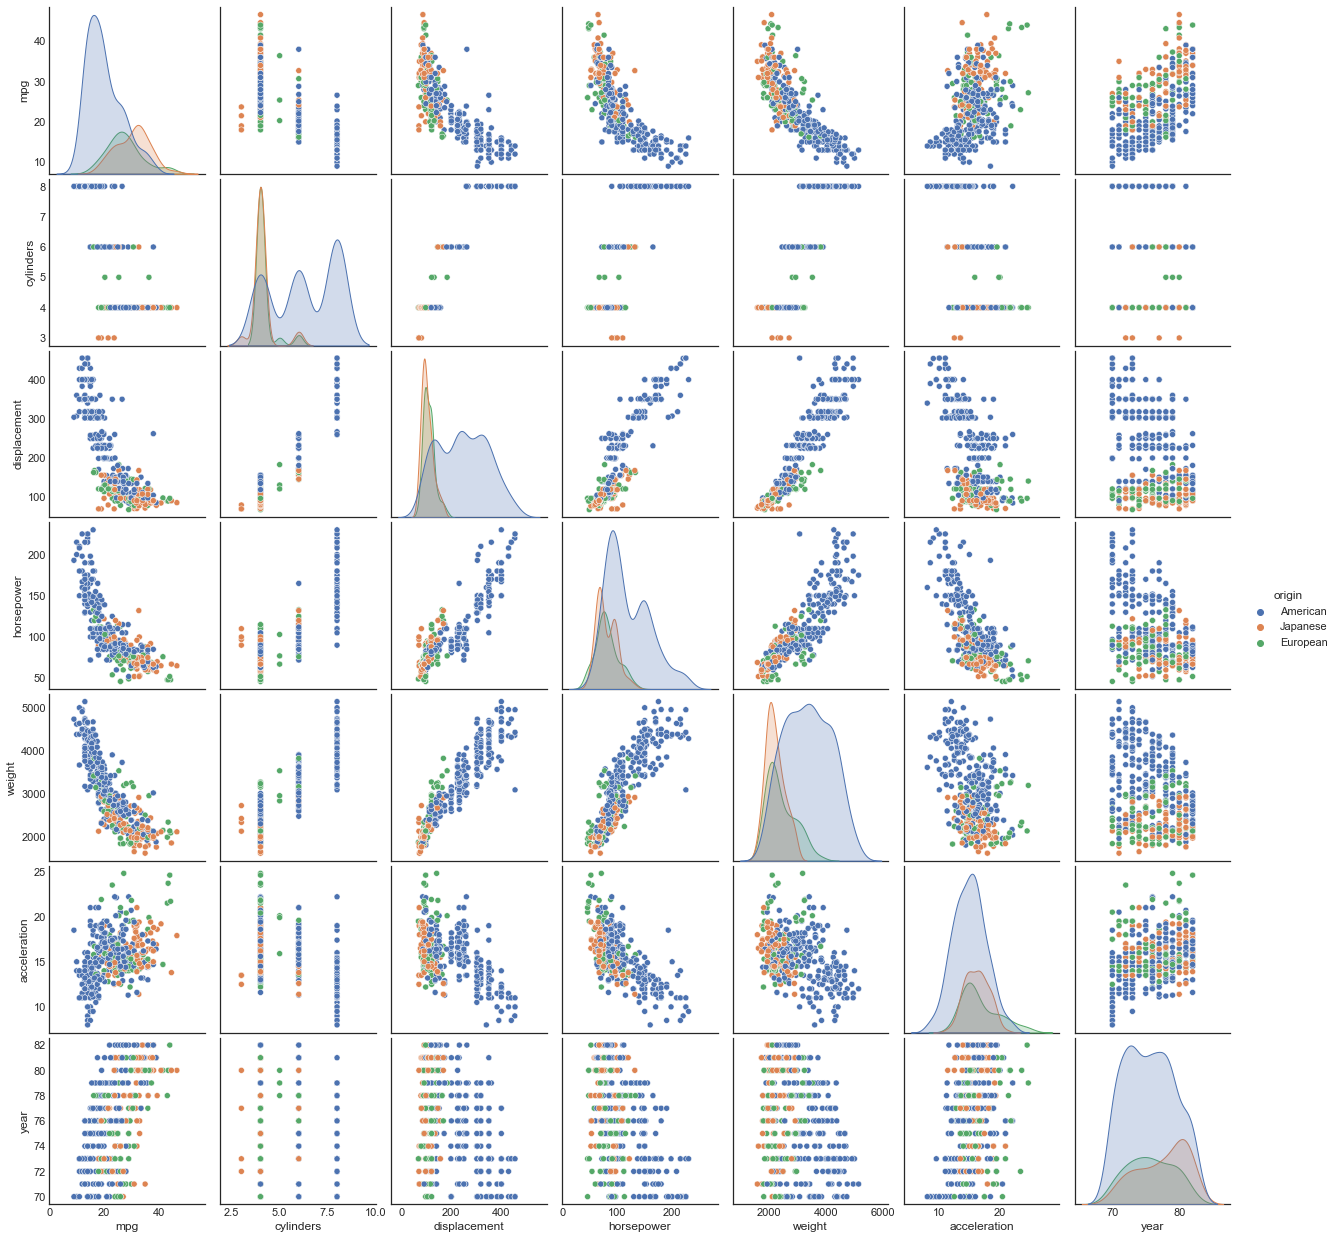

In [87]:
sns.pairplot(auto, hue="origin")

I'm using `origin` to set the hue in order to visually highlight the differences between American, Japanese, and European cars.

#### (b) Compute the matrix of correlations between the variables using the function `corr()`. It will automatically exclude the `origin` and `name` columns since they are qualitative.

In [88]:
auto.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration      year  
mpg               0.423329  0.580541  
cylinders        -0.504683 -0.345647  
displacement     -0.543800 -0.369855  
horsepower       -0.689196 -0.416361  
weight           -0.416839 -0.309120  
acceleration      1.000000  0.290316  
year              0.290316  1.000000

#### (c) Perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Print the results and comment on the output. For instance:

 - #### Is there a relationship between the predictors and the response?
 - #### Which predictors appear to have a statistically significant relationship to the response?
 - #### What does the coefficient for the `year` variable suggest?

In [89]:
mod_full=smf.ols("mpg ~cylinders + displacement + horsepower+ weight+acceleration+year+origin",auto).fit()
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          1.79e-139
Time:                        19:20:29   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -17.9546      4.677     -3.839      0.000     -27.150      -8.759
origin[T.European]     2.6300      0.566      4.643      0.000       1.516       3.744
origin[T.Japanese]     2.8532      0.553      5.162      0.000       1.766       3.940
cylinders             -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement           0.0240      0.008      3.133      0.002       0.009       0.039
horsepower            -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight                -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration           0.0791      0.098      0.805      0.421      -0.114       0.272
year                   0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the *F*-statistic is 224.5, giving a *p*-value of essentially zero for the null hypothesis  $H_0:\beta_j=0$ for all $j$ , there is strong evidence to believe that there is a relationship between the predictors and the response. The predictors that appear to have a statistically significant relationship to the response `mpg` are `displacement` with a *p*-value of 0.001863, and `weight`, `year`, `originEuropean`, and `originJapanese` with *p*-values of essentially zero. The coefficients for `cylinders`, `horsepower`, and `acceleration` have *p*-values which are not small enough to provide evidence of a statistically significant relationship to the response `mpg`. The coefficient of 0.777 for the `year` variable suggests that when we fix the number of engine `cylinders`, engine `displacement`, `horsepower`, `weight`, `acceleration`, and country of `origin`, fuel efficiency increases on average by about 0.777 miles per gallon each year. In other words, the model suggests that we would expect cars from 1971 to be more fuel efficient by 0.777 miles per gallon on average compared to equivalent cars from 1970. Also of interest are the coefficients for `originEuropean` and `originJapanese`, which suggest that compared to equivalent cars from the United States, we would expect European cars to be more fuel efficient by 2.630 miles per gallon on average, and Japanese cars to be more fuel efficient by 2.853 miles per gallon on average. Lastly, the  $R^2$  value of 0.8242 indicates that about 82% of the variation in `mpg` is explained by this least squares regression model.

Before moving on, let's also explore collinearity in this fit, since matrix of correlations above revealed that a number of variables were highly correlated with each other. We'll focus on just the quantitative variables.

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(auto.drop(columns = ["mpg", "origin", "name"]))
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const           753.863747
cylinders        10.633049
displacement     19.641683
horsepower        9.398043
weight           10.731681
acceleration      2.625581
year              1.244829
dtype: float64

As we can see, `cylinders`, `horsepower`, and `weight` each have variance inflation factors of approximately 10, while displacement has a variance inflation factor of almost 20. This, combined with the large in absolute value correlation values between those variables, provides strong evidence that there is a fair amount of multicollinearity between those four predictors. This makes sense when considering that the number of `cylinders`, engine `displacement`, and `horsepower` are closely related as characteristics of the car's engine, which also contributes a fair proportion of a car's weight.

#### (d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [91]:
results = pd.DataFrame({'name': auto.name,
                        'resids': mod_full.resid,
                        'std_resids': mod_full.resid_pearson,
                        'fitted': mod_full.predict()})
results.head()

name    resids  std_resids     fitted
0  chevrolet chevelle malibu  3.046748    0.921434  14.953252
1          buick skylark 320  0.959902    0.290305  14.040098
2         plymouth satellite  2.769449    0.837570  15.230551
3              amc rebel sst  1.005916    0.304221  14.994084
4                ford torino  2.098059    0.634520  14.901941

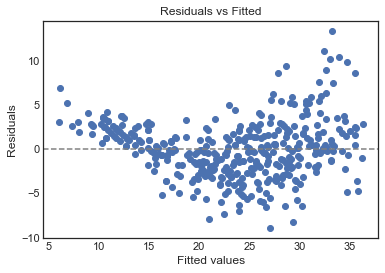

In [92]:
## raw residuals vs. fitted
residsvfitted = plt.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show(residsvfitted)

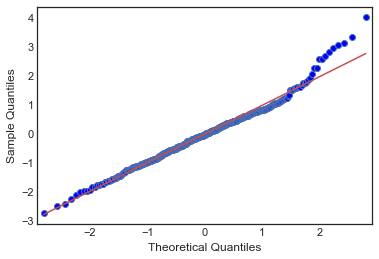

In [93]:
## q-q plot
qqplot = sm.qqplot(results['std_resids'], line='s')
plt.show(qqplot)

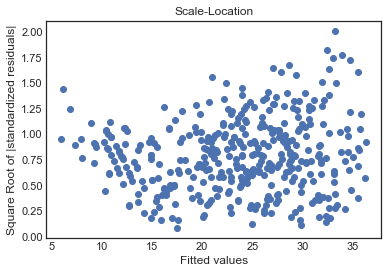

In [94]:
## scale-location
scalelocplot = plt.plot(results['fitted'], abs(results['std_resids'])**.5,  'o')
plt.xlabel('Fitted values')
plt.ylabel('Square Root of |standardized residuals|')
plt.title('Scale-Location')
plt.show(scalelocplot)

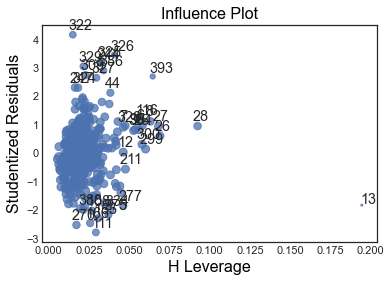

In [95]:
## residuals vs. leverage
residsvlevplot = sm.graphics.influence_plot(mod_full, criterion = 'Cooks', size = 2)
plt.show(residsvlevplot)

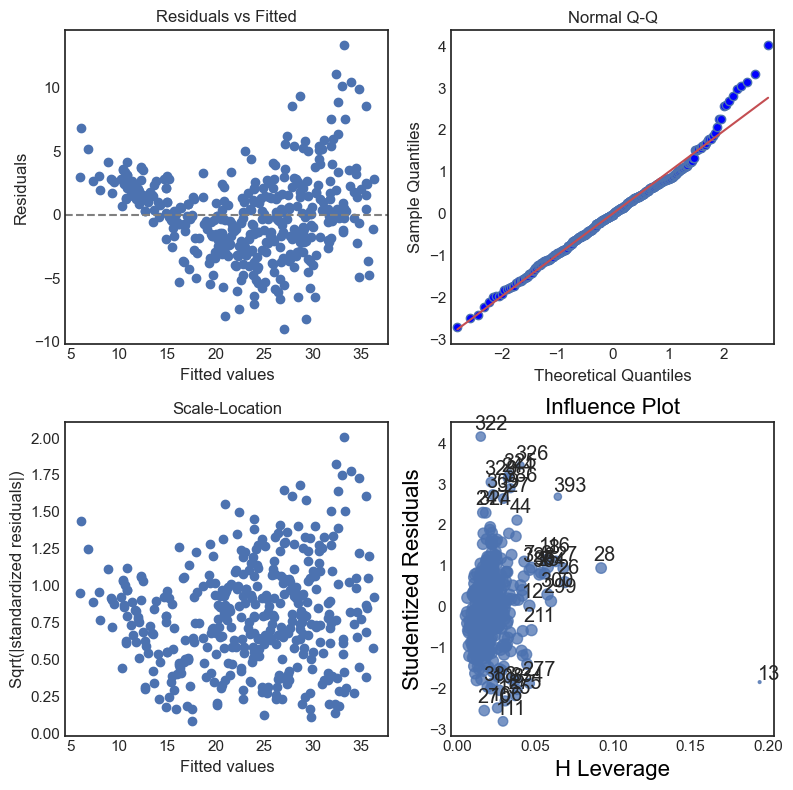

In [96]:
# 4 plots in one window
fig = plt.figure(figsize = (8, 8), dpi = 100)

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5,  'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(mod_full, criterion = 'Cooks', size = 2, ax = ax4)

plt.tight_layout()
fig.savefig('regplots.png')

Looking at the Residuals vs. Fitted plot, there appears to be moderate U-shape, which indicates that there might be non-linearity in the data. In addition, when looking at the Residuals vs. Leverage plot we can observe a few things. First, there are a number of observations with standardized residual values with absolute value greater than or equal to 3. Those are likely outliers. This is confirmed by looking at the Scale-Location plot, which has  $\sqrt{|Standardized residual|}$ as the  *y*-axis. Points with  $\sqrt{|Standardized residual|} \geq 1.732$  have  $|Standardized residual| \geq 3$ , which again means that they are likely outliers. Going back the the Residuals vs. Leverage plot, we also see that there are a couple points with unusually high leverage. Again remember that after dropping the rows with null values, there are 392 observations in the data set, giving an average leverage value of  $9/392≈0.023$ . There is one point with a leverage value of about 0.10, which is almost 5 times greater than the average. There is another point with a leverage of about 0.20, which is almost 10 times greater than the average.

#### (e) Fit some linear regression models with interaction effects. Do any interactions appear to be statistically significant?

First, I will fit a linear regression model using all possible second order interaction effects.

In [97]:
# Using R-style formulas in StatsModels
columns = "+".join(auto.columns.drop(["mpg", "name"]))
formula = "mpg ~ (" + columns + ")**2"
mod_all_interactions = smf.ols(formula = formula, data = auto)
res_all_interactions = mod_all_interactions.fit()
res_all_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     88.34
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          1.74e-153
Time:                        19:20:35   Log-Likelihood:                -916.16
No. Observations:                 392   AIC:                             1904.
Df Residuals:                     356   BIC:                             2047.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          44.0119     51.467      0.855      0.393     -57.206     145.230
origin[T.European]                -35.1651     12.602     -2.790      0.006     -59.949     -10.381
origin[T.Japanese]                -37.6464     14.261     -2.640      0.009     -65.693      -9.599
cylinders                           3.3016      8.187      0.403      0.687     -12.798      19.402
cylinders:origin[T.European]       -0.7210      1.088     -0.662      0.508      -2.861       1.419
cylinders:origin[T.Japanese]        1.2256      1.007      1.217      0.224      -0.755       3.206
displacement                       -0.3529      0.197     -1.788      0.075      -0.741       0.035
displacement:origin[T.European]    -0.0336      0.042     -0.797      0.426      -0.117       0.049
displacement:origin[T.Japanese]     0.0538      0.041      1.297      0.196      -0.028       0.135
horsepower                          0.5312      0.339      1.567      0.118      -0.135       1.198
horsepower:origin[T.European]      -0.0049      0.051     -0.096      0.923      -0.104       0.095
horsepower:origin[T.Japanese]       0.0229      0.063      0.366      0.715      -0.100       0.146
weight                             -0.0033      0.018     -0.179      0.858      -0.039       0.033
weight:origin[T.European]           0.0023      0.003      0.848      0.397      -0.003       0.008
weight:origin[T.Japanese]          -0.0045      0.003     -1.292      0.197      -0.011       0.002
acceleration                       -6.0483      2.147     -2.818      0.005     -10.270      -1.827
acceleration:origin[T.European]     0.9234      0.264      3.496      0.001       0.404       1.443
acceleration:origin[T.Japanese]     0.7159      0.326      2.198      0.029       0.075       1.357
year                                0.4833      0.592      0.816      0.415      -0.682       1.648
year:origin[T.European]             0.2932      0.144      2.031      0.043       0.009       0.577
year:origin[T.Japanese]             0.3139      0.148      2.116      0.035       0.022       0.606
cylinders:displacement             -0.0063      0.007     -0.889      0.375      -0.020       0.008
cylinders:horsepower                0.0145      0.025      0.591      0.555      -0.034       0.063
cylinders:weight                    0.0006      0.001      0.631      0.529      -0.001       0.002
cylinders:acceleration              0.3658      0.167      2.189      0.029       0.037       0.695
cylinders:year                     -0.1447      0.097     -1.499      0.135      -0.334       0.045
displacement:horsepower         -5.407e-05      0.000     -0.189      0.850      -0.001       0.001
displacement:weight              2.659e-05   1.45e-05      1.828      0.068   -2.02

While we could perform backward selection by sequentially removing the interaction term with the highest *p*-value, recalculating the least squares regression with the smaller set of predictors, and then continuing with the process until some sort of stopping condition is met (e.g. all *p*-values being under a given threshold or the adjusted  $R^2$  value no longer increasing with the removal of predictors), here's how to perform backwards stepwise selection.

In [98]:
# Using R-style formulas in StatsModels
mod_backwards_sel = smf.ols(formula = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + \
                            year + origin + cylinders:acceleration + cylinders:year + displacement:weight + \
                            displacement:year + displacement:origin + horsepower:weight + \
                            horsepower:acceleration + horsepower:year + weight:origin + acceleration:year + \
                            acceleration:origin + year:origin", data = auto)
res_backwards_sel = mod_backwards_sel.fit()
res_backwards_sel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     130.9
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          1.02e-163
Time:                        19:20:35   Log-Likelihood:                -918.70
No. Observations:                 392   AIC:                             1887.
Df Residuals:                     367   BIC:                             1987.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          28.2412     43.440      0.650      0.516     -57.182     113.664
origin[T.European]                -37.8078     10.246     -3.690      0.000     -57.956     -17.660
origin[T.Japanese]                -33.8981     11.388     -2.977      0.003     -56.292     -11.504
cylinders                           6.1030      6.179      0.988      0.324      -6.048      18.254
displacement                       -0.3829      0.132     -2.905      0.004      -0.642      -0.124
displacement:origin[T.European]    -0.0287      0.033     -0.866      0.387      -0.094       0.037
displacement:origin[T.Japanese]     0.1069      0.026      4.038      0.000       0.055       0.159
horsepower                          0.6570      0.253      2.593      0.010       0.159       1.155
weight                             -0.0084      0.001     -5.971      0.000      -0.011      -0.006
weight:origin[T.European]           0.0009      0.002      0.493      0.622      -0.003       0.004
weight:origin[T.Japanese]          -0.0057      0.002     -2.679      0.008      -0.010      -0.002
acceleration                       -4.9699      1.787     -2.781      0.006      -8.484      -1.456
acceleration:origin[T.European]     1.0065      0.182      5.525      0.000       0.648       1.365
acceleration:origin[T.Japanese]     0.8400      0.236      3.555      0.000       0.375       1.305
year                                0.5794      0.530      1.093      0.275      -0.463       1.622
year:origin[T.European]             0.2983      0.132      2.260      0.024       0.039       0.558
year:origin[T.Japanese]             0.2909      0.128      2.281      0.023       0.040       0.542
cylinders:acceleration              0.2326      0.069      3.347      0.001       0.096       0.369
cylinders:year                     -0.1249      0.084     -1.489      0.137      -0.290       0.040
displacement:weight               2.68e-05    5.8e-06      4.622      0.000    1.54e-05    3.82e-05
displacement:year                   0.0037      0.002      2.249      0.025       0.000       0.007
horsepower:weight                -1.79e-05   1.49e-05     -1.200      0.231   -4.73e-05    1.14e-05
horsepower:acceleration            -0.0049      0.003     -1.691      0.092      -0.011       0.001
horsepower:year                    -0.0075      0.003     -2.481      0.014      -0.013      -0.002
acceleration:year                   0.0493      0.022      2.283      0.023       0.007       0.092
==============================================================================
Omnibus:                       55.796   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.267
Skew:                           0.621   Prob(J

In total, using backward selection allowed us to increase our adjusted  $R^2$  by 0.002 from the original value of 0.887, which is a rather small increase. More importantly dropping unnecessary interaction terms helped a lot in simplifying the model to make it easier to interpret. Exploring a little bit, it seems as if removing further interaction terms doesn't improve the adjusted  $R^2$  value. What we are left with are the following interactions, grouped by level of statistical significance.

 - p-value less than 0.001: `cylinders:acceleration`, `displacement:originJapanese`, `acceleration:originEuropean`, `acceleration:originJapanese`
 - p-value between 0.001 and 0.01: `weight:originJapanese`
 - p-value between 0.01 and 0.05: `displacement:year`, `horsepower:year`, `acceleration:year`, `year:originEuropean`, `year:originJapanese`
 - p-value between 0.05 and 0.1: `horsepower:acceleration`
 - p-value greater than 0.1: `cylinders:year`, `displacement:originEuropean`, `horsepower:weight`, `weight:originEuropean`
 
An alternative, and generally better, approach to picking interaction terms to potentially include is to use our domain knowledge to think about which of the predictors might be related to each other. For example, it is reasonable to hypothesize that there might be an interaction effect between the number of engine cylinders and engine displacement, since spreading out the displacement among more cylinders might influence fuel economy.

In [99]:
# Using R-style formulas in StatsModels
mod_backwards_sel = smf.ols(formula = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + \
                            year + origin + cylinders:acceleration + cylinders:year + displacement:weight + \
                            displacement:year + displacement:origin + horsepower:weight + \
                            horsepower:acceleration + horsepower:year + weight:origin + acceleration:year + \
                            acceleration:origin + year:origin", data = auto)
res_backwards_sel = mod_backwards_sel.fit()
res_backwards_sel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     130.9
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          1.02e-163
Time:                        19:20:35   Log-Likelihood:                -918.70
No. Observations:                 392   AIC:                             1887.
Df Residuals:                     367   BIC:                             1987.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          28.2412     43.440      0.650      0.516     -57.182     113.664
origin[T.European]                -37.8078     10.246     -3.690      0.000     -57.956     -17.660
origin[T.Japanese]                -33.8981     11.388     -2.977      0.003     -56.292     -11.504
cylinders                           6.1030      6.179      0.988      0.324      -6.048      18.254
displacement                       -0.3829      0.132     -2.905      0.004      -0.642      -0.124
displacement:origin[T.European]    -0.0287      0.033     -0.866      0.387      -0.094       0.037
displacement:origin[T.Japanese]     0.1069      0.026      4.038      0.000       0.055       0.159
horsepower                          0.6570      0.253      2.593      0.010       0.159       1.155
weight                             -0.0084      0.001     -5.971      0.000      -0.011      -0.006
weight:origin[T.European]           0.0009      0.002      0.493      0.622      -0.003       0.004
weight:origin[T.Japanese]          -0.0057      0.002     -2.679      0.008      -0.010      -0.002
acceleration                       -4.9699      1.787     -2.781      0.006      -8.484      -1.456
acceleration:origin[T.European]     1.0065      0.182      5.525      0.000       0.648       1.365
acceleration:origin[T.Japanese]     0.8400      0.236      3.555      0.000       0.375       1.305
year                                0.5794      0.530      1.093      0.275      -0.463       1.622
year:origin[T.European]             0.2983      0.132      2.260      0.024       0.039       0.558
year:origin[T.Japanese]             0.2909      0.128      2.281      0.023       0.040       0.542
cylinders:acceleration              0.2326      0.069      3.347      0.001       0.096       0.369
cylinders:year                     -0.1249      0.084     -1.489      0.137      -0.290       0.040
displacement:weight               2.68e-05    5.8e-06      4.622      0.000    1.54e-05    3.82e-05
displacement:year                   0.0037      0.002      2.249      0.025       0.000       0.007
horsepower:weight                -1.79e-05   1.49e-05     -1.200      0.231   -4.73e-05    1.14e-05
horsepower:acceleration            -0.0049      0.003     -1.691      0.092      -0.011       0.001
horsepower:year                    -0.0075      0.003     -2.481      0.014      -0.013      -0.002
acceleration:year                   0.0493      0.022      2.283      0.023       0.007       0.092
==============================================================================
Omnibus:                       55.796   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.267
Skew:                           0.621   Prob(J

In [100]:
# Using R-style formulas in StatsModels
columns = "+".join(auto.columns.drop(["mpg", "name"]))
formula = "mpg ~ " + columns + " + cylinders:displacement"
mod_cyl_dis = smf.ols(formula = formula, data = auto)
res_cyl_dis = mod_cyl_dis.fit()
res_cyl_dis.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     235.4
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          6.88e-150
Time:                        19:20:35   Log-Likelihood:                -992.95
No. Observations:                 392   AIC:                             2006.
Df Residuals:                     382   BIC:                             2046.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.4936      4.763     -0.733      0.464     -12.859       5.872
origin[T.European]         1.3454      0.555      2.424      0.016       0.254       2.437
origin[T.Japanese]         1.4580      0.548      2.662      0.008       0.381       2.535
cylinders                 -2.6328      0.412     -6.392      0.000      -3.443      -1.823
displacement              -0.0727      0.015     -4.976      0.000      -0.101      -0.044
horsepower                -0.0474      0.013     -3.546      0.000      -0.074      -0.021
weight                    -0.0054      0.001     -8.477      0.000      -0.007      -0.004
acceleration               0.0596      0.092      0.650      0.516      -0.121       0.240
year                       0.7727      0.048     15.984      0.000       0.678       0.868
cylinders:displacement     0.0132      0.002      7.588      0.000       0.010       0.017
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.743
Skew:                           0.398   Prob(JB):                     4.35e-16
Kurtosis:                       4.923   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this expanded model, the `cylinders:displacement` term has a *p*-value of essentially zero, which provides evidence to suggest that it is a statistically significant interaction. Moreover, its inclusion has resulted in the adjusted  $R^2$  value to increase from 0.821 in the original model using all predictors to 0.84.

#### (d) Try a few different transformations of the variables, such as  $log(X)$, $\sqrt{X}$, $X^2$ . Comment on your findings.

To get a sense of which transformations I want to try out for each quantitative variable, focusing on `displacement`, `horsepower`, `weight`, and `acceleration`, I'll look at the scatterplots of each one versus `mpg`.

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

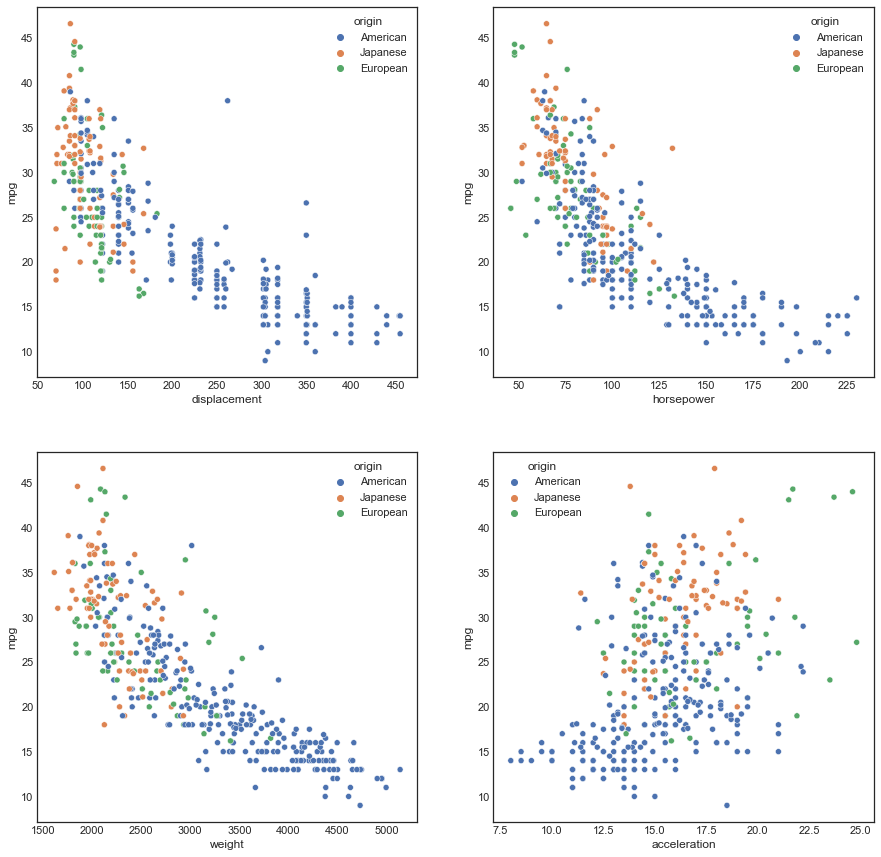

In [101]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))
sns.scatterplot(x = "displacement", y = "mpg", hue = "origin", data = auto, ax = axes[0, 0])
sns.scatterplot(x = "horsepower", y = "mpg", hue = "origin", data = auto, ax = axes[0, 1])
sns.scatterplot(x = "weight", y = "mpg", hue = "origin", data = auto, ax = axes[1, 0])
sns.scatterplot(x = "acceleration", y = "mpg", hue = "origin", data = auto, ax = axes[1, 1])

The book already explored nonlinear transformations of `horsepower` to predict `mpg`, so I will first look at transforms of `acceleration`.

In [102]:
# Using StatsModels
mod = sm.OLS(auto["mpg"], sm.add_constant(auto["acceleration"]))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     85.15
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.78e-18
Time:                        19:20:36   Log-Likelihood:                -1322.5
No. Observations:                 392   AIC:                             2649.
Df Residuals:                     390   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8332      2.048      2.359      0.019       0.806       8.861
acceleration     1.1976      0.130      9.228      0.000       0.942       1.453
==============================================================================
Omnibus:                       16.649   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.415
Skew:                           0.492   Prob(JB):                     0.000165
Kurtosis:                       2.684   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

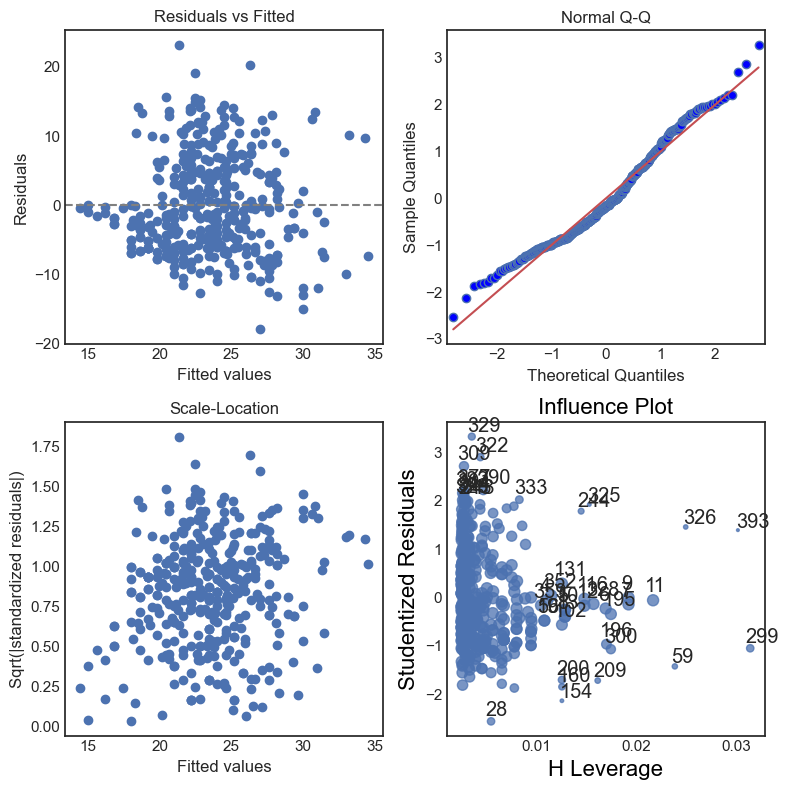

In [103]:
results = pd.DataFrame({'name': auto.name,
                        'resids': res.resid,
                        'std_resids': res.resid_pearson,
                        'fitted': res.predict()})
results.head()

fig = plt.figure(figsize = (8, 8), dpi = 100)

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5,  'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(res, criterion = 'Cooks', size = 2, ax = ax4)

plt.tight_layout()

It appears that there might be heteroscedasticity, or non-constant variances in the error terms, so let's first see how applying a logarithmic transportation affects the model.

In [104]:
# Using StatsModels
mod = sm.OLS(auto["mpg"], sm.add_constant(np.log(auto["acceleration"])))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     91.49
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.31e-19
Time:                        19:20:38   Log-Likelihood:                -1319.9
No. Observations:                 392   AIC:                             2644.
Df Residuals:                     390   BIC:                             2652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -27.8343      5.373     -5.180      0.000     -38.398     -17.271
acceleration    18.8013      1.966      9.565      0.000      14.937      22.666
==============================================================================
Omnibus:                       16.164   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.927
Skew:                           0.485   Prob(JB):                     0.000211
Kurtosis:                       2.694   Cond. No.                         46.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

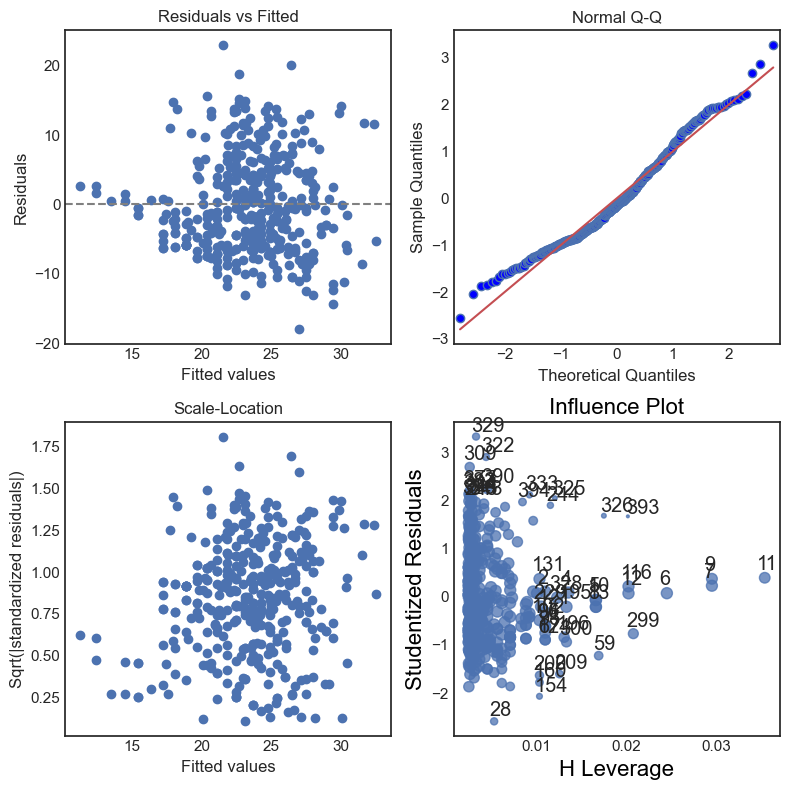

In [105]:
results = pd.DataFrame({'name': auto.name,
                        'resids': res.resid,
                        'std_resids': res.resid_pearson,
                        'fitted': res.predict()})
results.head()

fig = plt.figure(figsize = (8, 8), dpi = 100)

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5,  'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(res, criterion = 'Cooks', size = 2, ax = ax4)

plt.tight_layout()

While the transformation did bump up the  $R^2$  value very slightly, it didn't really do anything to help with the residuals. This is probably due to the fact that two cars with the same 0 to 60 mile per hour time could be quite different in other ways that would affect fuel economy, such has differences in engine efficiency. For the remainder of the problem, let's turn our attention the the relationship between engine `displacement` and fuel efficiency. From the scatterplot, it is pretty clear that there is a nonlinear relationship between the two quantities. Let's start off by comparing a linear model to one that also includes the quadratic term.

Note that when doing this problem in R, we used the poly() function, which produces [orthogonal polynomials](https://en.wikipedia.org/wiki/Orthogonal_polynomials), and not raw ones. This is important because even though orthogonalizing the polynomials doesn't affect overall predictions the model will give, it reduces the correlation between the various powers of  X  at the cost of sacrificing coefficient interpretability. Reducing the correlation between the powers improves our ability to interpret the *t*-statistics for each coeffiecient, because it alleviates the issue of multicollinearity. Since the `PolynomialFeatures` transformer in scikit-learn generates raw polynomials, we add an extra the orthogonalization step in order to better evaluate whether or not the inclusion of non-linear terms improves the model fit.

In [106]:
auto["displacement_sq"]=auto.displacement**2
disp_lin=smf.ols("mpg ~ displacement",auto).fit()
disp_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.66e-90
Time:                        19:20:40   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
auto["displacement_sq"]=auto.displacement**2
disp_lin=smf.ols("mpg ~ displacement_sq",auto).fit()
disp_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     508.7
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.08e-72
Time:                        19:20:40   Log-Likelihood:                -1197.6
No. Observations:                 392   AIC:                             2399.
Df Residuals:                     390   BIC:                             2407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          29.2577      0.366     79.923      0.000      28.538      29.977
displacement_sq    -0.0001   5.29e-06    -22.554      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       38.414   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.066
Skew:                           0.792   Prob(JB):                     6.02e-11
Kurtosis:                       3.610   Cond. No.                     9.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***

### Question 9
#### This question should be answered using the [Carseats](https://rdrr.io/cran/ISLR/man/Carseats.html) data set.

In [5]:
carseats = pd.read_csv("Carseats.csv") #I stored my Carseats.csv file in the same folder as my notebook
carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

#### (a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

In [6]:
# Using R-style formulas in StatsModels
mod_1 = smf.ols(formula = "Sales ~ Price + Urban + US", data = carseats)
res_1 = mod_1.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           2.39e-23
Time:                        10:44:44   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

The coefficient of -0.054459 for `Price` means that, for a given location (i.e. fixed values of `Urban` and `US`), increasing the price of a car seat by \\$1 results in a decrease of sales by approximately 54.46 units, on average, in the model. The coefficient of -0.021916 for `UrbanYes` means that, for a given carseat price point and value of `US`, the model predicts urban areas to have approximately 22 fewer carseat sales on average compared to non-urban areas. The coefficient of 1.200573 for `USYes` means that, for a given carseat price point and value of `Urban`, the model predicts that stores in the United States have 1201 more carseat sales on average than stores outside the United States.

#### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

The model has the following equation.

$\hat{Y}= 13.043 − 0.054Price − 0.022Urban + 1.200US$
 
Here,  \hat{y}  is the estimated carseat sales, in thousands of car seats;  $x_{1j}$  is the price of the carseat at the $j$th store, in dollars; and  $x_{2j}$   and  $x_{3j}$   are dummy variables to represent whether or not the  $j$th store is located in an urban area and in the United States, respectively. More concretely,  $x_{2j}$  and  $x_{3j}$  use the following coding scheme.

$x_{2j} = \begin{cases}
  1, \text{if the jth store is in an urban location} \\ 
  0, \text{if the jth store is not in an urban location}  
\end{cases}$ 

$x_{3j} = \begin{cases}
  1, \text{if the jth store is in the United States} \\ 
  0, \text{if the jth store is not the United States}  
\end{cases}$ 

#### (d) For which of the predictors can you reject the null hypothesis $H_0: \beta_{j} = 0$?

The p-values for the intercept, `Price`, and `USYes` are all essentially zero, which provides strong evidence to reject the null hypothesis  $H_0:\beta_j=0$  for those predictors. The *p*-value for `UrbanYes`, however, is 0.936, so there is no evidence to reject the null hypothesis that it has a non-zero coefficient in the true relationship between the predictors and `Sales`.

#### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [7]:
# Using R-style formulas in StatsModels
mod_2 = smf.ols(formula = "Sales ~ Price + US + ShelveLoc", data = carseats)
res_2 = mod_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     131.9
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           2.00e-71
Time:                        10:44:53   Log-Likelihood:                -812.71
No. Observations:                 400   AIC:                             1635.
Df Residuals:                     395   BIC:                             1655.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.4763      0.498     23.041      0.000      10.497      12.456
US[T.Yes]               1.0131      0.195      5.194      0.000       0.630       1.397
ShelveLoc[T.Good]       4.8272      0.277     17.408      0.000       4.282       5.372
ShelveLoc[T.Medium]     1.8934      0.227      8.323      0.000       1.446       2.341
Price                  -0.0578      0.004    -14.683      0.000      -0.066      -0.050
==============================================================================
Omnibus:                        1.264   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.233
Skew:                           0.029   Prob(JB):                        0.540
Kurtosis:                       2.734   Cond. No.                         651.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (f) How well do the models in (a) and (e) fit the data?

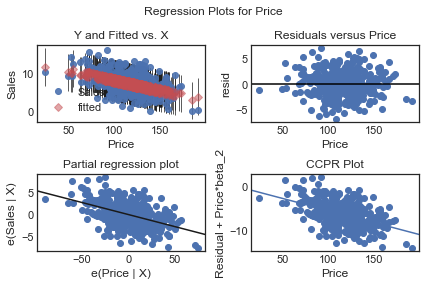

In [111]:
fig = sm.graphics.plot_regress_exog(res_2, "Price")
fig.tight_layout(pad=1.0)

#### (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

These are part of statsmodels standard output

In [112]:
res_2.summary().tables[1]


<class 'statsmodels.iolib.table.SimpleTable'>

***

### Question 10
#### This problem involves simple linear regression without an intercept.

#### (a) Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of $Y$ onto $X$ without an intercept is given by 

$\hat{\beta} = \frac{\Big(\sum_{i=1}^n x_i y_i \Big)}{\Big(\sum_{i=1}^n {x_i}^2\Big)}$.

#### Under what circumstance is the coefficient estimate for the regression of $X$ onto $Y$ the same as the coefficient estimate for the regression of $Y$ onto $X$?

Since the numerator in the formula for  $\hat{\beta}$  is symmetric in  $X$  and  $Y$, the coefficient estimate for the regression of  $X$  onto  $Y$  will be same as the coefficient estimate for the regression of  $Y$  onto  $X$  when

$\sum_{j=1}^n x_{j}^2 = \sum_{j=1}^n y_{j}^2$


#### (b) Generate an example in Python with  *n* = 100  observations in which the coefficient estimate for the regression of  $X$  onto  $Y$  is _different_ from the coefficient estimate for the regression of $Y$  onto  $X$.

In [113]:
np.random.seed(1)
x = np.random.normal(loc = 0.0, scale = 1.0, size = (100, 1))
y = 3*x + np.random.normal(loc = 0.0, scale = 1.0, size = (100, 1))

# Using StatsModels for regression of y onto x
mod_y_onto_x = sm.OLS(y, x)
res_y_onto_x = mod_y_onto_x.fit()
res_y_onto_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              851.8
Date:                Thu, 23 Sep 2021   Prob (F-statistic):                    1.97e-50
Time:                        19:20:42   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.1067      0.106     29.186      0.000       2.896       3.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Using StatsModels for regression of x onto y
mod_x_onto_y = sm.OLS(x, y)
res_x_onto_y = mod_x_onto_y.fit()
res_x_onto_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              851.8
Date:                Thu, 23 Sep 2021   Prob (F-statistic):                    1.97e-50
Time:                        19:20:42   Log-Likelihood:                         -16.817
No. Observations:                 100   AIC:                                      35.63
Df Residuals:                      99   BIC:                                      38.24
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2884      0.010     29.186      0.000       0.269       0.308
==============================================================================
Omnibus:                        0.399   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.485
Skew:                           0.143   Prob(JB):                        0.785
Kurtosis:                       2.815   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (c) Generate an example in Python with  *n* = 100  observations in which the coefficient estimate for the regression of  $X$  onto  $Y$  is _the same as_ the coefficient estimate for the regression of $Y$  onto  $X$.

In [115]:
np.random.seed(1)
x = np.random.normal(loc = 0.0, scale = 1.0, size = (100, 1))
y = np.random.permutation(x)

In [116]:
# Using StatsModels for regression of y onto x
mod_y_onto_x = sm.OLS(y, x)
res_y_onto_x = mod_y_onto_x.fit()
res_y_onto_x.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [117]:
# Using StatsModels for regression of x onto y
mod_x_onto_y = sm.OLS(x, y)
res_x_onto_y = mod_x_onto_y.fit()
res_x_onto_y.summary().tables[1]


<class 'statsmodels.iolib.table.SimpleTable'>